In [188]:
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rc("font", family = "Malgun Gothic")
import warnings
warnings.filterwarnings(action='ignore') # warning 문구 안보이게

# Sales_data02.csv 전처리

In [189]:
# data_path = "/home/piai/다운로드/빅데이터 분석/B1_유아용품(온라인쇼핑)/"
data_path = "./data/"

In [190]:
df_sales = pd.read_csv(data_path + "Sales_data02.csv",parse_dates = ["구매일", "배송시작일", "배송완료일"])

In [191]:
df_sales.isnull().sum()

주문번호             0
구매일              0
배송시작일            0
배송완료일            0
구매시월령(수정)    31857
고객번호             0
구매금액             0
결제금액             0
물품대분류            0
상품명              0
dtype: int64

구매시월령(수정) null 값 애매해서 일단 놔두기로 하였다. 그 외에 결측치 없으니 바로 이상치를 살펴보았다.

## 이상치

In [192]:
df_sales.head()

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)


주문번호, 구매일, 배송시작일, 배송완료일, 고객번호는 이상치 없을 것이다.  
물품대분류, 상품명은 이후에 처리하고 여기에 붙히면 된다.
결제금액의 경우 건드릴 건 따로 없고  
구매금액은 0원인 애들만 따로 처리하기로 결정하였다.

### 구매시월령, 구매금액, 결제금액의 박스플롯, 히스토그램

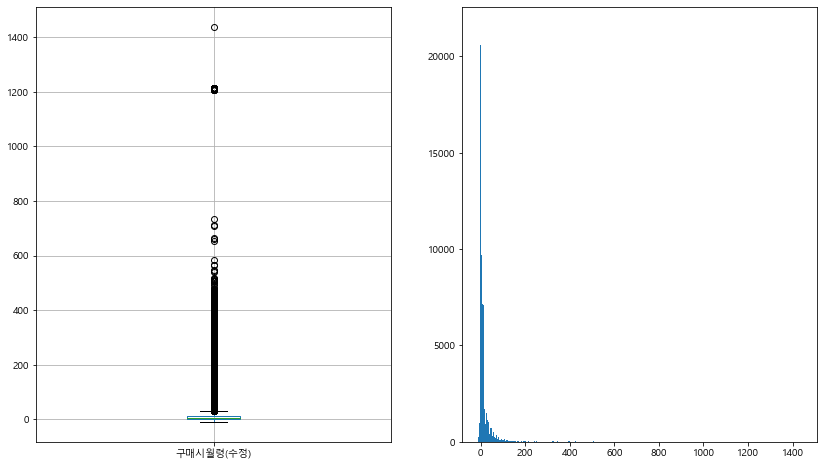

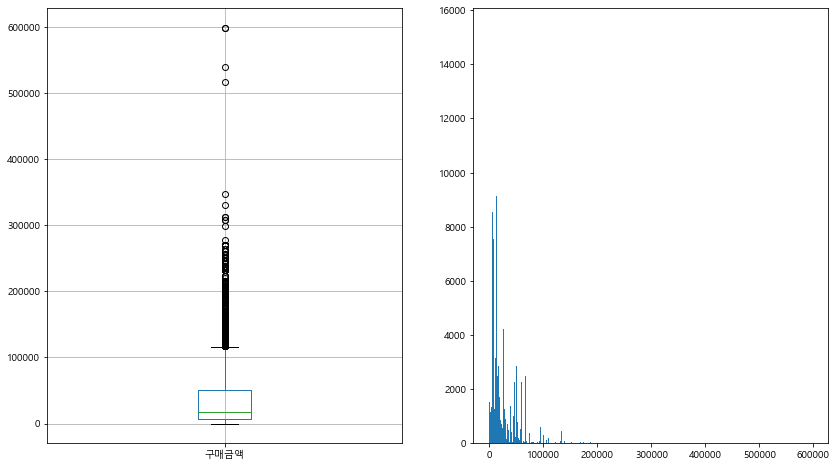

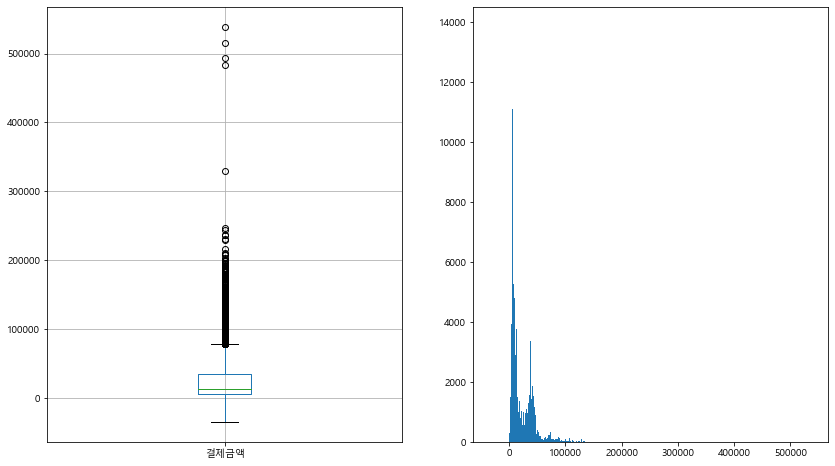

In [193]:
plt.rcParams['figure.figsize'] = (14,8)
outlier_list = ["구매시월령(수정)", "구매금액", "결제금액"]
for i in outlier_list:
    plt.subplot(1,2,1)
    df_sales.boxplot(column = i)
    plt.subplot(1,2,2)
    plt.hist(df_sales[i], bins = 1000)
    plt.show()

- 구매시월령
- 구매금액: 50만원 이상인 것 찾아보기  
- 결제금액: 45만원 이상인 것 찾아보기 + 음수 값이 보인다 처리해주기  

### 구매시월령

In [194]:
df_sales['구매시월령(수정)'][df_sales['구매시월령(수정)'] > 19 * 12] = np.nan

In [195]:
df_sales.isnull().sum()

주문번호             0
구매일              0
배송시작일            0
배송완료일            0
구매시월령(수정)    32791
고객번호             0
구매금액             0
결제금액             0
물품대분류            0
상품명              0
dtype: int64

### 구매금액

In [196]:
df_sales[df_sales['구매금액'] > 500000]

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
35101,202004053626442,2020-04-06,2020-04-07,2020-04-09,12.0,201902060789794,516000,516000,기타,[뉴나] 째즈 식탁의자
44220,202003153533426,2020-03-15,2020-03-16,2020-03-18,14.0,201902170802655,539000,539000,기타,[해밀턴] X1 매직폴딩 휴대용 유모차
112296,201905232406065,2019-05-23,2019-05-24,2019-05-26,NaN,201905230899981,598000,483120,기저귀,[모닛X하기스] 스마트 베이비 모니터
112297,201905232406072,2019-05-23,2019-05-24,2019-05-26,NaN,201905230899981,598000,493020,기저귀,[모닛X하기스] 스마트 베이비 모니터


### 결제금액

#### 0원 이하인 경우

In [197]:
df_sales[df_sales['결제금액'] < 0]

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
87632,20200630134701-72037838607,2020-06-30,2020-07-01,2020-07-03,12.0,201904040860910,43900,-35166,팬티,2020 하기스 매직팬티 컴포트 썸머 4단계 공용 96매(팬티형)


결제금액이 음수일 리는 없으니 절댓값 처리를 해주었다.

In [198]:
df_sales['결제금액'] = abs(df_sales['결제금액'])

In [199]:
df_sales[df_sales['결제금액'] < 0]

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명


#### 45만원 이상인 경우

In [200]:
df_sales[df_sales['결제금액'] > 450000]

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
35101,202004053626442,2020-04-06,2020-04-07,2020-04-09,12.0,201902060789794,516000,516000,기타,[뉴나] 째즈 식탁의자
44220,202003153533426,2020-03-15,2020-03-16,2020-03-18,14.0,201902170802655,539000,539000,기타,[해밀턴] X1 매직폴딩 휴대용 유모차
112296,201905232406065,2019-05-23,2019-05-24,2019-05-26,NaN,201905230899981,598000,483120,기저귀,[모닛X하기스] 스마트 베이비 모니터
112297,201905232406072,2019-05-23,2019-05-24,2019-05-26,NaN,201905230899981,598000,493020,기저귀,[모닛X하기스] 스마트 베이비 모니터


위의 구매금액과 같은 케이스로 따로 처리하지 않았다.

### 이상치 처리 후 최종 결과

In [201]:
df_sales.head()

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)


## 파생변수

- ### 상품준비시간

In [202]:
df_sales['상품준비시간'] = (df_sales['배송시작일'] - df_sales['구매일']).dt.days
df_sales['상품준비시간'] = df_sales['상품준비시간'].astype(int)

In [203]:
df_sales.groupby(['상품준비시간']).count()[['구매일']]

,구매일
상품준비시간,
1,199999


상품준비시간이 모두 1일인 것으로 나타났다.

- ### 배송시간

In [204]:
df_sales['배송시간'] = (df_sales['배송완료일'] - df_sales['배송시작일']).dt.days
df_sales['배송시간'] = df_sales['배송시간'].astype(int)

In [205]:
df_sales.groupby(['배송시간']).count()[['구매일']]

,구매일
배송시간,
2,139841
3,46215
4,13943


이 부분은 추후 주말, 공휴일이 끼였는지 등의 정보를 활용해서 좀 더 심층있게 분석할 필요가 있다.

- ### 시간 관련 변수(연도, 월, 요일, 주차, 배송시작주차, 배송완료주차)

In [206]:
df_sales['연도'] = pd.DatetimeIndex(df_sales['구매일']).year
df_sales['월'] = pd.DatetimeIndex(df_sales['구매일']).month
df_sales['요일'] = df_sales['구매일'].dt.dayofweek ## 0 = 월요일
df_sales['주차'] = df_sales['구매일'].dt.week ## 0 = 월요일
df_sales['배송시작주차'] = df_sales['배송시작일'].dt.week ## 0 = 월요일
df_sales['배송완료주차'] = df_sales['배송완료일'].dt.week ## 0 = 월요일

In [207]:
df_sales['배송주말포함여부'] = df_sales['배송완료주차'] - df_sales['배송시작주차']

In [208]:
df_sales.groupby(['배송주말포함여부']).count()[['주문번호']]

,주문번호
배송주말포함여부,
-51,898
0,135502
1,63599


-51이란 값이 나온 데이터를 알아보기로 했다.

In [209]:
df_sales[df_sales['배송주말포함여부'] == -51].groupby(['배송시작주차', '배송완료주차']).count()

,,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,상품준비시간,배송시간,연도,월,요일,주차,배송주말포함여부
배송시작주차,배송완료주차,,,,,,,,,,,,,,,,,
52,1,898,898,898,898,772,898,898,898,898,898,898,898,898,898,898,898,898


전부 다 해가 넘어갈 때의 케이스로 해당 값을 1로 수정해주었다.

In [210]:
df_sales['배송주말포함여부'][df_sales['배송주말포함여부'] == -51] = 1

In [211]:
df_sales.groupby(['배송주말포함여부']).count()[['주문번호']]

,주문번호
배송주말포함여부,
0,135502
1,64497


In [212]:
df_sales.groupby(['배송시간', '배송주말포함여부']).count()[['주문번호']]

주문번호
배송시간 배송주말포함여부        
2    0         102850
     1          36991
3    0          26871
     1          19344
4    0           5781
     1           8162

- 무조건 2일 이상은 걸린다.
- 3~4일 걸리는데 주말이 포함되어있지 않은 경우에 대한 면밀한 분석 필요하다고 생각한다. 

In [213]:
df_sales.drop(['배송시작주차', '배송완료주차'], axis = 1, inplace = True)

배송시작주차, 배송완료주차는 배송주말포함여부 생성하는데만 사용했으므로 제거해주었다.

- ### 분기

In [214]:
q_1 = (df_sales['월'] >= 1) & (df_sales['월'] <= 3)
q_2 = (df_sales['월'] >= 4) & (df_sales['월'] <= 6)
q_3 = (df_sales['월'] >= 7) & (df_sales['월'] <= 9)
q_4 = (df_sales['월'] >= 10) & (df_sales['월'] <= 12)
df_sales['분기'] = '1'

df_sales['분기'][q_1] = '1분기'
df_sales['분기'][q_2] = '2분기'
df_sales['분기'][q_3] = '3분기'
df_sales['분기'][q_4] = '4분기'

#### 분기별 매출

<AxesSubplot:xlabel='연도,분기'>

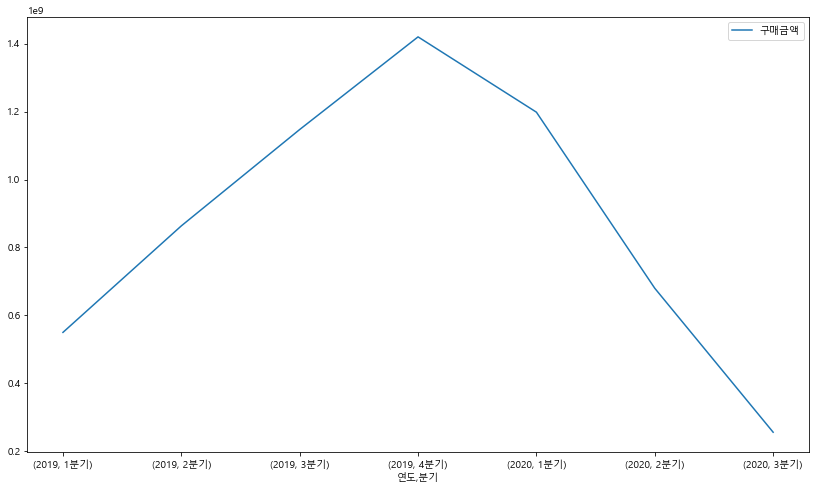

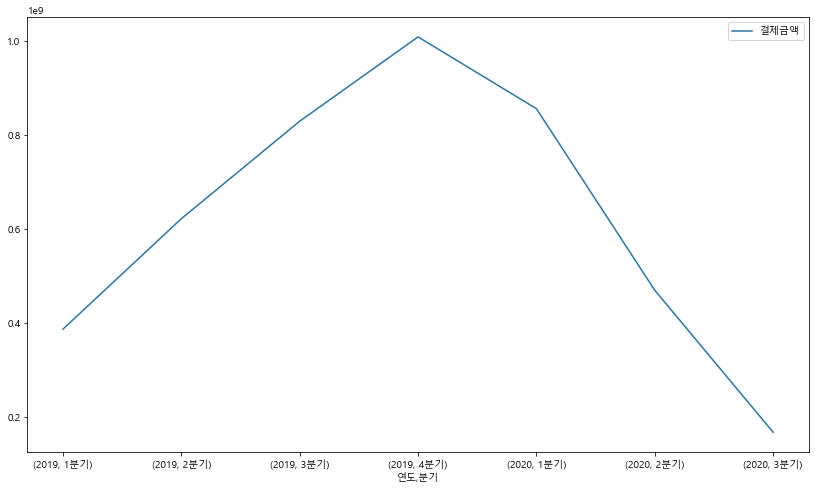

In [215]:
df_sales.groupby(['연도', '분기']).sum()[['구매금액']].plot()
df_sales.groupby(['연도', '분기']).sum()[['결제금액']].plot()

In [216]:
df_sales.구매일.max()

Timestamp('2020-08-07 00:00:00')

- 2019년 4분기에 최대치를 찍고 내려오고 있다. 
- 2020년 3분기는 데이터가 8월까지여서 참고할 필요는 없으나, 전반적으로 하락세이다.

- ### 주말

In [217]:
df_sales['주말'] = np.where(df_sales['요일']>=5, '1', '0')

- ### 계절

In [218]:
spring = (df_sales['월'] >= 3) & (df_sales['월'] <= 5)
summer = (df_sales['월'] >= 6) & (df_sales['월'] <= 8)
autumn = (df_sales['월'] >= 9) & (df_sales['월'] <= 12)
winter = (df_sales['월'] >= 12) | (df_sales['월'] <= 2)

In [219]:
df_sales['계절'] = '1'
df_sales['계절'][spring] = '봄'
df_sales['계절'][summer] = '여름'
df_sales['계절'][autumn] = '가을'
df_sales['계절'][winter] = '겨울'

In [220]:
def dummy_severity(df, col1, col2):
    cat_var = pd.crosstab(columns=df[col1], index=df[col2])
    
    Sum = cat_var.sum(axis=1)
    for i in Sum.index:
        cat_var.loc[i] = cat_var.loc[i]/Sum.loc[i]

    #plot a stacked plot
    cat_var.plot(kind='bar',stacked=True,figsize=(8, 6))
    plt.xticks(rotation = 45)
    plt.xlabel(col2, fontsize = 15)

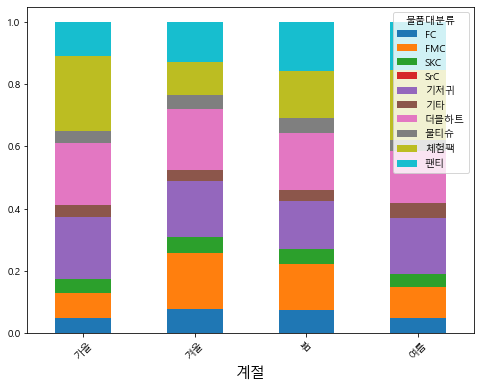

In [221]:
dummy_severity(df_sales, '물품대분류', '계절')

- ### 할인금액

In [222]:
df_sales['할인금액'] = df_sales['구매금액'] - df_sales['결제금액']

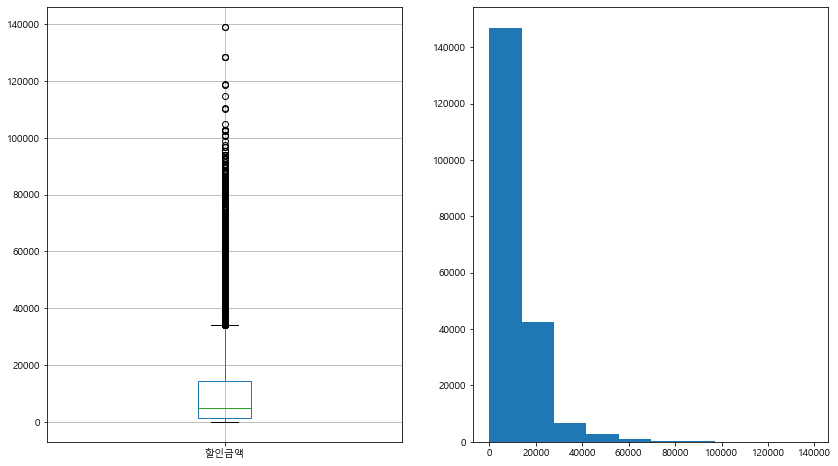

In [223]:
plt.subplot(1,2,1)
df_sales.boxplot(column = '할인금액')
plt.subplot(1,2,2)
plt.hist(df_sales['할인금액'])
plt.show()

개별 고객의 데이터 정보를 삽입하기 위해 뒤에 member 데이터하고 합치려고 하는데, 일단 이대로 남겨두고 member 데이터 전처리 후에 합칠 예정이다.

## 추가 전처리

In [224]:
df_zero_give = df_sales[(df_sales['구매금액'] == 0) | (df_sales['물품대분류'] == '체험팩')]

In [225]:
df_sales = df_sales[(df_sales['구매금액'] != 0) & (df_sales['물품대분류'] != '체험팩')]

In [226]:
df_cherry = df_zero_give.groupby(['고객번호']).count()[['주문번호']]
df_cherry.rename(columns = {'주문번호' : '체험팩 수령 횟수' }, inplace = True)
df_cherry.head()

,체험팩 수령 횟수
고객번호,
201812310749780,1
201812310749784,2
201812310749787,1
201812310749827,5
201812310749839,3


# Member_data02.csv 전처리

In [227]:
df_member = pd.read_csv(data_path + "Member_data02.csv")

In [228]:
df_member.isnull().sum()

ID        0
성별        0
결혼유무      0
거주지역      0
연령        0
결제등록카드    0
유입경로      0
자녀여부      0
dtype: int64

In [229]:
df_member[df_member['ID'].isnull()]

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부


어느 경우에는 NaN값이 없지만, 어떤 경우에는 뒤에 266개 데이터가 전부 NaN 값으로 읽어지기에 결측치 처리를 해주었다.

In [230]:
df_member.dropna(axis = 0, inplace = True)

In [231]:
df_member.isnull().sum()

ID        0
성별        0
결혼유무      0
거주지역      0
연령        0
결제등록카드    0
유입경로      0
자녀여부      0
dtype: int64

In [232]:
df_member.describe()

,ID,연령
count,8.109400e+04,81094.000000
mean,2.019058e+14,32.803228
std,4.807578e+09,2.948941
min,2.018123e+14,20.000000
25%,2.019023e+14,31.000000
50%,2.019053e+14,33.000000
75%,2.019091e+14,35.000000
max,2.019123e+14,46.000000


In [233]:
df_member.shape

(81094, 8)

In [234]:
df_member.columns

Index(['ID', '성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부'], dtype='object')

In [235]:
for i in df_member.columns:
    print(len(set(df_member[i])))

81094
2
2
15
27
24
10
2


- 81094개 데이터로 ID값 다 unique하다. 
- 성별 2개, 결혼유무 2개, 거주지역 15개, 자녀여부 2개

- ### 결제등록카드

In [236]:
set(df_member['결제등록카드'])

{'BC카드',
 'SC제일은행',
 '경남은행',
 '광주은행',
 '국민은행',
 '국민카드',
 '기업은행',
 '농협중앙회',
 '농협회원조합',
 '대구은행',
 '롯데카드',
 '미래에셋증권',
 '부산은행',
 '삼성카드',
 '새마을금고',
 '신한은행',
 '신한카드',
 '신협중앙회',
 '씨티은행',
 '외환은행',
 '우리은행',
 '우체국',
 '하나은행',
 '현대카드'}

In [237]:
df_member.groupby(['결제등록카드']).count()[['ID']].sort_values(by=['ID'], axis=0, ascending = False)

,ID
결제등록카드,
국민은행,11016
롯데카드,10913
농협회원조합,9168
신한은행,8700
농협중앙회,7937
우리은행,7313
국민카드,3416
신한카드,3227
하나은행,2660


- ### 유입경로

In [238]:
df_member.groupby(['유입경로']).count()[['ID']].sort_values(by=['ID'], axis=0, ascending = False)

,ID
유입경로,
인스타그램,31167
네이버블로그,22684
검색광고,8259
지인추천,8021
네이버카페,5725
오픈마켓,2022
페이스북,1405
직접검색,1137
매장쿠폰,456


# Product_data.csv 전처리
- 원본 데이터의 물품대분류가 정확하지 않아 직접 분류를 다시 해주었다.

In [239]:
df = pd.read_csv(data_path + 'Product_data.csv')

In [240]:
# 기저귀의 핑크퐁 -> 기타
df.loc[((df.상품명.str.contains('핑크퐁'))& (df.물품대분류 == '기저귀')), '물품대분류'] = '기타'

In [241]:
# 기저귀 + 팬티 -> 기저귀/팬티
df['물품대분류'] = df['물품대분류'].apply(lambda a: '기저귀/팬티' if a =='기저귀' else '기저귀/팬티' if a == '팬티' else a)

# 스마트 프리미엄 멤버십 가입선물 -> 기타
df.loc[((df.상품명.str.contains('멤버십'))& (df.물품대분류 == '기저귀/팬티')), '물품대분류'] = '기타'

# 기타의 하기스 -> 기저귀/팬티
df.loc[((df.상품명.str.contains('2020 하기스'))& (df.물품대분류 == '기타')), '물품대분류'] = '기저귀/팬티'

In [242]:
# 더블하트 -> 아기용품
list3 = ['탕온', '섬유', '손톱', '위생', '면봉', '콧물', '핀셋', '온습도계', '오일', '크림', 
         '미스트', '로션', '목욕', '워시']
for i in list3:
    df.loc[((df.상품명.str.contains(i)) & (df.물품대분류 == '더블하트')), '물품대분류'] = '아기용품' 

# 아기용품 중에서 -> 출산/수유/이유
df.loc[((df.상품명.str.contains('젖병'))& (df.물품대분류 == '아기용품')), '물품대분류'] = '출산/수유/이유'
df.loc[((df.상품명.str.contains('젖꼭지'))& (df.물품대분류 == '아기용품')), '물품대분류'] = '출산/수유/이유'

# 더블하트 나머지 -> '출산/수유/이유'
df.loc[(df.물품대분류 == '더블하트'), '물품대분류'] = '출산/수유/이유' 

In [243]:
# FC + SrC -> 여성용품
df['물품대분류'] = df['물품대분류'].apply(lambda a: '여성용품' if a =='FC' else '여성용품' if a == 'SrC' else a)

# 기타의 페미닌 -> 여성용품
df.loc[((df.상품명.str.contains('페미닌'))& (df.물품대분류 == '기타')), '물품대분류'] = '여성용품'

In [244]:
# FMC -> 생활/가정용품
df.loc[(df.물품대분류 == 'FMC'), '물품대분류'] = '생활/가정용품' 

In [245]:
# 기저귀/팬티의 물티슈 -> 물티슈
df.loc[((df.상품명.str.contains('물티슈'))& (df.물품대분류 == '기저귀/팬티')), '물품대분류'] = '물티슈'

# 기타 -> 물티슈
df.loc[((df.상품명.str.contains('그린핑거 어니스트 물티슈'))& (df.물품대분류 == '기타')), '물품대분류'] = '물티슈'
df.loc[((df.상품명.str.contains('그린핑거 판테딘 물티슈'))& (df.물품대분류 == '기타')), '물품대분류'] = '물티슈'

In [246]:
# SKC -> 아기용품
df.loc[(df.물품대분류 == 'SKC'), '물품대분류'] = '아기용품' 

# 아기용품 -> 기타
df.loc[((df.상품명.str.contains('티엔'))& (df.물품대분류 == '아기용품')), '물품대분류'] = '기타'
df.loc[((df.상품명.str.contains('레드투래드'))& (df.물품대분류 == '아기용품')), '물품대분류'] = '기타'

In [247]:
# 기타 -> 출산/수유/이유
list4 = ['비박스','보보앤부','스와들업']
for i in list4:
    df.loc[((df.상품명.str.contains(i)) & (df.물품대분류 == '기타')), '물품대분류'] = '출산/수유/이유' 

# 먼치킨
list5 = ['이유','컵']
for i in list5:
    df.loc[(df.상품명.str.contains(i)) & (df.물품대분류 == '기타') & (df.상품명.str.contains('먼치킨')), '물품대분류'] = '출산/수유/이유'

df.loc[(df.물품대분류 == '출산/수유/이유')& (df.상품명.str.contains('놀이')), '물품대분류'] = '기타'
    
# 실리만
list6 = ['이유','젖꼭지','젖병','치발기']
for i in list6:
    df.loc[(df.상품명.str.contains(i)) & (df.물품대분류 == '기타') & (df.상품명.str.contains('실리만')), '물품대분류'] = '출산/수유/이유'

# 올라베이비
list7 = ['이유','스푼']
for i in list7:
    df.loc[(df.상품명.str.contains(i)) & (df.물품대분류 == '기타') & (df.상품명.str.contains('올라베이비')), '물품대분류'] = '출산/수유/이유'

# 기타 -> 아기용품
df.loc[((df.상품명.str.contains('누들앤부'))& (df.물품대분류 == '기타')), '물품대분류'] = '아기용품'

In [248]:
df.columns

Index(['물품대분류', '상품명', '물품판매량', '제품단가'], dtype='object')

In [249]:
df = df[['물품대분류', '상품명']]

In [250]:
a = pd.DataFrame(df.groupby(['상품명'])['물품대분류'].unique())

# 분석용 데이터셋 생성
위에서 전처리를 마친 것을 가지고 실제 데이터 분석에 사용하는 형태로 생성하였다.

In [251]:
df_sales.head()

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,상품준비시간,배송시간,연도,월,요일,주차,배송주말포함여부,분기,주말,계절,할인금액
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,4,2019,5,0,19,0,2분기,0,봄,9486
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,2,2020,2,3,8,0,1분기,0,겨울,13431
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,1,4,2019,2,3,9,1,1분기,0,겨울,1810
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,2,2019,5,0,20,0,2분기,0,봄,11598
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1,2,2019,5,4,19,1,2분기,0,봄,10852


In [252]:
df_sales.rename(columns = {'주문번호_x' : '주문번호'}, inplace = True)

In [253]:
df_member.head()

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201812310749735,여,기혼,인천,37,국민은행,인스타그램,Yes
1,201812310749770,여,기혼,제주,33,국민은행,검색광고,Yes
2,201812310749771,여,기혼,부산,32,하나은행,네이버블로그,Yes
3,201812310749774,여,미혼,경남,34,기업은행,지인추천,No
4,201812310749780,여,기혼,서울,32,신한은행,직접검색,Yes


## 1. df_sales_new 데이터에 df_member 데이터 붙히기
- 해당 데이터로 시계열적인 부분 파악 가능하며, 배송 관련된 부분 해결하면 좋을 듯하다.

In [254]:
df_final1 = pd.merge(df_sales, df_member, left_on = '고객번호', right_on = 'ID', how = 'left')

In [255]:
df_final1.head()

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,상품준비시간,배송시간,연도,월,요일,주차,배송주말포함여부,분기,주말,계절,할인금액,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,4,2019,5,0,19,0,2분기,0,봄,9486,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,2,2020,2,3,8,0,1분기,0,겨울,13431,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,1,4,2019,2,3,9,1,1분기,0,겨울,1810,2.018123e+14,여,기혼,제주,33.0,국민은행,검색광고,Yes
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,2,2019,5,0,20,0,2분기,0,봄,11598,2.018123e+14,여,기혼,부산,32.0,하나은행,네이버블로그,Yes
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1,2,2019,5,4,19,1,2분기,0,봄,10852,2.018123e+14,여,미혼,경남,34.0,기업은행,지인추천,No


In [256]:
df_final1 = pd.merge(df_final1, a, on = '상품명', how = 'left')
df_final1['물품대분류_y'] = df_final1['물품대분류_y'].astype(str)
df_final1.drop(['물품대분류_x'], axis = 1, inplace = True)
df_final1.rename(columns = {'물품대분류_y' : '물품대분류'}, inplace = True)

- 구매일, 배송시작일, 배송완료일은 일자별 추세를 보기위한 시각화 용도로 사용할 예정. 
- 주문번호, 고객번호는 주로 key값으로 쓰일 예정.

## 2. df_member 데이터에 df_sales_new 데이터 붙히기
- sales 데이터에서 각 멤버별 특징을 뽑아내서 df_member에 붙혀주었다.
- 해당 데이터는 member별로 군집화해서 member별 특징으로 구매 품목에 대한 추천을 할 수 있을 것이다.

### df_sales_new 데이터에서 유의미한 값들 뽑아내주는 작업
1. 고객별 구매 총 금액

In [257]:
df_for_merge1 = df_sales.groupby(['고객번호']).sum()[['구매금액', '결제금액']]
df_for_merge1.head()

,구매금액,결제금액
고객번호,,
201812310749735,77000,54083
201812310749770,5610,3800
201812310749771,59520,47922
201812310749774,151920,116532
201812310749783,290770,236963


2. 각 고객별 주문한 횟수

In [258]:
df_for_merge2 = pd.DataFrame(df_sales.groupby(['고객번호']).count()[['주문번호']])
df_for_merge2.rename(index = {'주문번호': '주문횟수'}, inplace = True)
df_for_merge2.head()

,주문번호
고객번호,
201812310749735,2
201812310749770,1
201812310749771,1
201812310749774,2
201812310749783,8


3. 물품대분류로 어떤 상품 샀는지  
- 상품명으로 하면 약 3000개 column 새로 생겨서 일단 물품대분류로 알아보았다.  

In [259]:
df_final2 = pd.merge(df_member, df_for_merge1, left_on = 'ID', right_on = '고객번호', how = 'left')
df_final2 = pd.merge(df_final2, df_for_merge2, left_on = 'ID', right_on = '고객번호', how = 'left')

In [260]:
df_final2.head()

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,구매금액,결제금액,주문번호
0,201812310749735,여,기혼,인천,37,국민은행,인스타그램,Yes,77000.0,54083.0,2.0
1,201812310749770,여,기혼,제주,33,국민은행,검색광고,Yes,5610.0,3800.0,1.0
2,201812310749771,여,기혼,부산,32,하나은행,네이버블로그,Yes,59520.0,47922.0,1.0
3,201812310749774,여,미혼,경남,34,기업은행,지인추천,No,151920.0,116532.0,2.0
4,201812310749780,여,기혼,서울,32,신한은행,직접검색,Yes,NaN,NaN,NaN


In [261]:
df_cherry.head()

,체험팩 수령 횟수
고객번호,
201812310749780,1
201812310749784,2
201812310749787,1
201812310749827,5
201812310749839,3


In [262]:
df_final2 = pd.merge(df_final2, df_cherry, left_on = 'ID', right_on = '고객번호', how = 'left')

In [263]:
df_final2.fillna(0, inplace = True)

In [264]:
df_final2.head()

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,구매금액,결제금액,주문번호,체험팩 수령 횟수
0,201812310749735,여,기혼,인천,37,국민은행,인스타그램,Yes,77000.0,54083.0,2.0,0.0
1,201812310749770,여,기혼,제주,33,국민은행,검색광고,Yes,5610.0,3800.0,1.0,0.0
2,201812310749771,여,기혼,부산,32,하나은행,네이버블로그,Yes,59520.0,47922.0,1.0,0.0
3,201812310749774,여,미혼,경남,34,기업은행,지인추천,No,151920.0,116532.0,2.0,0.0
4,201812310749780,여,기혼,서울,32,신한은행,직접검색,Yes,0.0,0.0,0.0,1.0


In [265]:
df_final2.isnull().sum()

ID           0
성별           0
결혼유무         0
거주지역         0
연령           0
결제등록카드       0
유입경로         0
자녀여부         0
구매금액         0
결제금액         0
주문번호         0
체험팩 수령 횟수    0
dtype: int64

#### 데이터 성향을 고려한 컬럼명 수정

In [266]:
df_final2.rename({'주문번호': '주문횟수'}, axis=1, inplace = True)
df_final2.rename({'체험팩 수령 횟수': '체험팩수령횟수'}, axis=1, inplace = True)

#### 연령대 추가
- 20대, 30대, 40대 등 연령대에 대한 데이터가 있으면 좋아보여서 추가했다.

In [267]:
df_final2.columns

Index(['ID', '성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부', '구매금액',
       '결제금액', '주문횟수', '체험팩수령횟수'],
      dtype='object')

In [268]:
age20 = (df_final2['연령'] >= 20) & (df_final2['연령'] <= 29)
age30 = (df_final2['연령'] >= 30) & (df_final2['연령'] <= 39)
age40 = (df_final2['연령'] >= 40) & (df_final2['연령'] <= 49)

df_final2['연령대'] = '1'
df_final2['연령대'][age20] = '20대'
df_final2['연령대'][age30] = '30대'
df_final2['연령대'][age40] = '40대'

In [269]:
df_final2.head()

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,구매금액,결제금액,주문횟수,체험팩수령횟수,연령대
0,201812310749735,여,기혼,인천,37,국민은행,인스타그램,Yes,77000.0,54083.0,2.0,0.0,30대
1,201812310749770,여,기혼,제주,33,국민은행,검색광고,Yes,5610.0,3800.0,1.0,0.0,30대
2,201812310749771,여,기혼,부산,32,하나은행,네이버블로그,Yes,59520.0,47922.0,1.0,0.0,30대
3,201812310749774,여,미혼,경남,34,기업은행,지인추천,No,151920.0,116532.0,2.0,0.0,30대
4,201812310749780,여,기혼,서울,32,신한은행,직접검색,Yes,0.0,0.0,0.0,1.0,30대


## 3. df_product 데이터에 df_sales_new 데이터 붙히기
- 생략, df_sales_new에서 groupby 해주면 해당 부분에 대한 데이터 다 얻을 수 있다.

## 결론
분석에 쓸 데이터셋은 df_final1, df_final2 2개입니다. 상황에 맞게 활용해서 사용하면 될 듯 합니다.  

In [270]:
df_final1.head()

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,상품명,상품준비시간,배송시간,연도,월,요일,주차,배송주말포함여부,분기,주말,계절,할인금액,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,물품대분류
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,4,2019,5,0,19,0,2분기,0,봄,9486,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes,['출산/수유/이유']
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,2,2020,2,3,8,0,1분기,0,겨울,13431,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes,['기저귀/팬티']
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,크리넥스？키즈용？화장지？3겹？27m 8롤,1,4,2019,2,3,9,1,1분기,0,겨울,1810,2.018123e+14,여,기혼,제주,33.0,국민은행,검색광고,Yes,['생활/가정용품']
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,2,2019,5,0,20,0,2분기,0,봄,11598,2.018123e+14,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,['기저귀/팬티']
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1,2,2019,5,4,19,1,2분기,0,봄,10852,2.018123e+14,여,미혼,경남,34.0,기업은행,지인추천,No,['기저귀/팬티']


In [271]:
df_final1.shape

(163046, 29)

In [272]:
df_final2.head()

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,구매금액,결제금액,주문횟수,체험팩수령횟수,연령대
0,201812310749735,여,기혼,인천,37,국민은행,인스타그램,Yes,77000.0,54083.0,2.0,0.0,30대
1,201812310749770,여,기혼,제주,33,국민은행,검색광고,Yes,5610.0,3800.0,1.0,0.0,30대
2,201812310749771,여,기혼,부산,32,하나은행,네이버블로그,Yes,59520.0,47922.0,1.0,0.0,30대
3,201812310749774,여,미혼,경남,34,기업은행,지인추천,No,151920.0,116532.0,2.0,0.0,30대
4,201812310749780,여,기혼,서울,32,신한은행,직접검색,Yes,0.0,0.0,0.0,1.0,30대


In [273]:
df_final2.isnull().sum()

ID         0
성별         0
결혼유무       0
거주지역       0
연령         0
결제등록카드     0
유입경로       0
자녀여부       0
구매금액       0
결제금액       0
주문횟수       0
체험팩수령횟수    0
연령대        0
dtype: int64

## 가설에 기반한 EDA

### 배송시간
상품 준비시간은 1일로 다 동일하다.  
해당 날짜에 동일한 품목으로 주문한 횟수가 많으면 배송시간이 오래 걸릴 것이다?!

In [274]:
df_final1.head()

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,상품명,상품준비시간,배송시간,연도,월,요일,주차,배송주말포함여부,분기,주말,계절,할인금액,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,물품대분류
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,4,2019,5,0,19,0,2분기,0,봄,9486,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes,['출산/수유/이유']
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,2,2020,2,3,8,0,1분기,0,겨울,13431,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes,['기저귀/팬티']
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,크리넥스？키즈용？화장지？3겹？27m 8롤,1,4,2019,2,3,9,1,1분기,0,겨울,1810,2.018123e+14,여,기혼,제주,33.0,국민은행,검색광고,Yes,['생활/가정용품']
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,2,2019,5,0,20,0,2분기,0,봄,11598,2.018123e+14,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,['기저귀/팬티']
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1,2,2019,5,4,19,1,2분기,0,봄,10852,2.018123e+14,여,미혼,경남,34.0,기업은행,지인추천,No,['기저귀/팬티']


In [275]:
df_final1['배송지연여부_주말'] = np.where((df_final1['배송시간']>=3) & (df_final1['배송주말포함여부'] >= 1)
                                  , '1', '0')

In [276]:
df_final1.head()

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,상품명,상품준비시간,배송시간,연도,월,요일,주차,배송주말포함여부,분기,주말,계절,할인금액,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,물품대분류,배송지연여부_주말
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,4,2019,5,0,19,0,2분기,0,봄,9486,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes,['출산/수유/이유'],0
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,2,2020,2,3,8,0,1분기,0,겨울,13431,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes,['기저귀/팬티'],0
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,크리넥스？키즈용？화장지？3겹？27m 8롤,1,4,2019,2,3,9,1,1분기,0,겨울,1810,2.018123e+14,여,기혼,제주,33.0,국민은행,검색광고,Yes,['생활/가정용품'],1
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,2,2019,5,0,20,0,2분기,0,봄,11598,2.018123e+14,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,['기저귀/팬티'],0
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1,2,2019,5,4,19,1,2분기,0,봄,10852,2.018123e+14,여,미혼,경남,34.0,기업은행,지인추천,No,['기저귀/팬티'],0


해당 날짜에 동일한 품목으로 주문한 횟수가 많으면 배송시간이 오래 걸릴 것이다?!

In [277]:
df_final1_numeric = df_final1.select_dtypes(exclude = "object")
df_final1_char = df_final1.select_dtypes(include = "object")

In [278]:
df_final1_char.columns

Index(['주문번호', '고객번호', '상품명', '분기', '주말', '계절', '성별', '결혼유무', '거주지역', '결제등록카드',
       '유입경로', '자녀여부', '물품대분류', '배송지연여부_주말'],
      dtype='object')

In [279]:
from scipy.stats import shapiro, levene, bartlett, ttest_ind, mannwhitneyu, f_oneway, chi2_contingency

In [280]:
for i in df_final1_char.iloc[:,1:].columns:
    dat = df_final1_char.groupby(['배송지연여부_주말', i]).count()[['주문번호']].unstack(-1).fillna(0)
    print(i)
    print(chi2_contingency(dat)[1])
    print("____________________")

고객번호
3.290304661950099e-137
____________________
상품명
3.4876764060347173e-07
____________________
분기
4.7640115393879723e-32
____________________
주말
4.235391313933486e-28
____________________
계절
1.8487273346794105e-17
____________________
성별
0.5406470590738496
____________________
결혼유무
0.9614869662975851
____________________
거주지역
0.9248364496030121
____________________
결제등록카드
0.48508228743073434
____________________
유입경로
0.4757565535675391
____________________
자녀여부
0.8634025598440952
____________________
물품대분류
7.118555988292911e-05
____________________
배송지연여부_주말
0.0
____________________


In [281]:
def dummy_severity(df, col1, col2):
    cat_var = pd.crosstab(columns=df[col1], index=df[col2])
    
    Sum = cat_var.sum(axis=1)
    for i in Sum.index:
        cat_var.loc[i] = cat_var.loc[i]/Sum.loc[i]

    #plot a stacked plot
    cat_var.plot(kind='bar',stacked=True,figsize=(8, 6))
    plt.xticks(rotation = 45)
    plt.xlabel(col2, fontsize = 15)

In [282]:
def cat(df, col1, col2):
    cat_var = pd.crosstab(columns=df[col1], index=df[col2])

    Sum = cat_var.sum(axis=1)
    for i in Sum.index:
        cat_var.loc[i] = cat_var.loc[i]/Sum.loc[i]
    
    print(cat_var)

<AxesSubplot:xlabel='계절'>

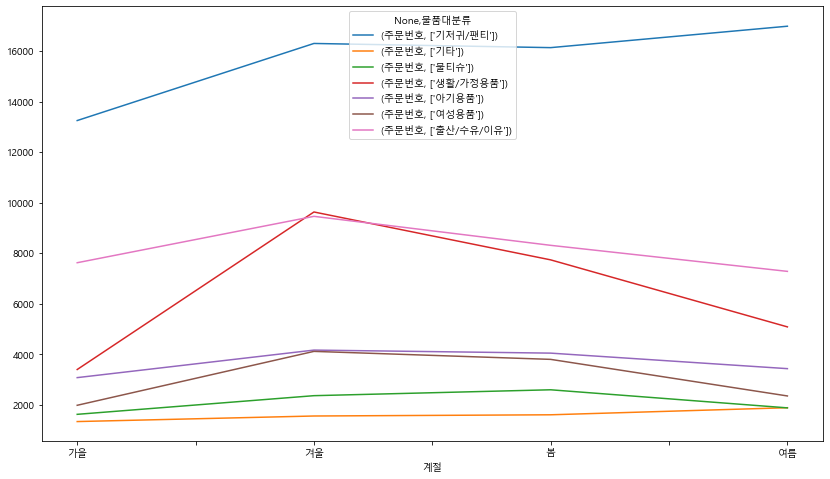

In [283]:
df_final1.groupby(['계절', '물품대분류']).count()[['주문번호']].unstack(-1).plot()

In [284]:
df_final1.groupby(['구매일', '물품대분류']).count()[['주문번호']].unstack(-1).fillna(0)

주문번호                                               \
물품대분류      ['기저귀/팬티'] ['기타'] ['물티슈'] ['생활/가정용품'] ['아기용품'] ['여성용품']   
구매일                                                                  
2019-01-01       23.0    1.0     2.0         2.0      2.0      1.0   
2019-01-02       25.0    0.0     2.0         2.0      1.0      0.0   
2019-01-03       28.0    0.0     1.0         8.0      5.0      1.0   
2019-01-04        8.0    1.0     1.0        11.0      2.0      1.0   
2019-01-05       22.0    0.0     0.0         6.0      2.0      3.0   
...               ...    ...     ...         ...      ...      ...   
2020-08-03       97.0    3.0    12.0        25.0      8.0      9.0   
2020-08-04      125.0    6.0     7.0        29.0     15.0      6.0   
2020-08-05       95.0    5.0    11.0        12.0     17.0      6.0   
2020-08-06       72.0   14.0     6.0        15.0      9.0     10.0   
2020-08-07       44.0    3.0     1.0        11.0      5.0      5.0   

                         
물품대분류      ['출산/수유/이유']  
구매일                      
2019-01-01          8.0  
2019-01-02         11.0  
2019-01-03         25.0  
2019-01-04         24.0  
2019-01-05         20.0  
...                 ...  
2020-08-03         32.0  
2020-08-04         27.0  
2020-08-05         20.0  
2020-08-06         20.0  
2020-08-07          5.0  

[581 rows x 7 columns]

In [285]:
df_raw = pd.DataFrame(df_final1.groupby(['구매일', '물품대분류']).count()[['주문번호']].unstack(-1).iloc[:,0])

In [286]:
money = df_final1.groupby(['물품대분류']).sum()[['결제금액']]
count = df_final1.groupby(['물품대분류']).count()[['결제금액']]

([<matplotlib.patches.Wedge at 0x15d89b15e48>,
 [Text(0.3911352884551885, 1.028111465807612, "['기저귀/팬티']"),
  Text(-0.905535050704622, 0.6245048213948213, "['기타']"),
  Text(-1.0451330746805836, 0.3430697541444161, "['물티슈']"),
  Text(-1.035463727362759, -0.37123425127003334, "['생활/가정용품']"),
  Text(-0.4730994365322808, -0.9930644103746941, "['아기용품']"),
  Text(0.08283626446045908, -1.096876544233779, "['여성용품']"),
  Text(0.8890733502206005, -0.6477256965162935, "['출산/수유/이유']")],
 [Text(0.21334652097555734, 0.5607880722586974, '38.4%'),
  Text(-0.49392820947524835, 0.3406389934880843, '3.9%'),
  Text(-0.5700725861894091, 0.1871289568060451, '5.2%'),
  Text(-0.564798396743323, -0.2024914097836545, '15.9%'),
  Text(-0.2580542381085168, -0.5416714965680148, '9.0%'),
  Text(0.04518341697843222, -0.5982962968547885, '7.5%'),
  Text(0.4849491001203275, -0.35330492537252367, '20.0%')])

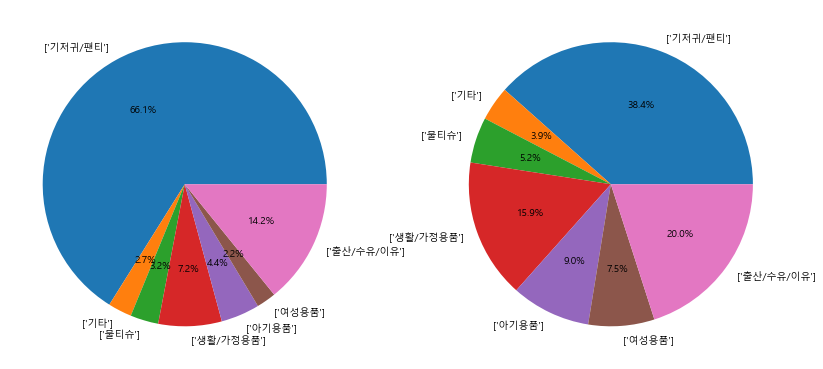

In [287]:
plt.subplot(1,2,1)
plt.pie(money['결제금액'], labels = money.index.tolist(), autopct = "%.1f%%")
plt.subplot(1,2,2)
plt.pie(count['결제금액'], labels = count.index.tolist(), autopct = "%.1f%%")

In [288]:
df_final1.groupby(['물품대분류']).mean()[['결제금액']]

,결제금액
물품대분류,
['기저귀/팬티'],43908.909155
['기타'],17617.011562
['물티슈'],15707.039773
['생활/가정용품'],11604.722364
['아기용품'],12454.403897
['여성용품'],7555.671208
['출산/수유/이유'],18036.931358


[우리의 주력 상품]
1. 기저귀/팬티이다. 전체 매출의 66.1%에 육박한다.  
2. 출산/수유/이유 물품 전체 매출의 14.2%에 육박한다.

In [289]:
df_money = df_final1.groupby(['연도', '월', '물품대분류']).count()[['주문번호']].unstack(-1).fillna(0)

In [290]:
df_final2.head()

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,구매금액,결제금액,주문횟수,체험팩수령횟수,연령대
0,201812310749735,여,기혼,인천,37,국민은행,인스타그램,Yes,77000.0,54083.0,2.0,0.0,30대
1,201812310749770,여,기혼,제주,33,국민은행,검색광고,Yes,5610.0,3800.0,1.0,0.0,30대
2,201812310749771,여,기혼,부산,32,하나은행,네이버블로그,Yes,59520.0,47922.0,1.0,0.0,30대
3,201812310749774,여,미혼,경남,34,기업은행,지인추천,No,151920.0,116532.0,2.0,0.0,30대
4,201812310749780,여,기혼,서울,32,신한은행,직접검색,Yes,0.0,0.0,0.0,1.0,30대


# 마케팅 파트
- K-means 활용해서 우수 군집 확인 후, 연관규칙학습을 통해 판매 방안 수립  
- 이후 DT/RF/GB 등 활용해서 우수 군집 여부에 대한 예측 모델 생성

## K-means

In [291]:
pd_for_merge4 = df_sales[['고객번호', '구매시월령(수정)']].groupby(['고객번호']).max()
df_final2 = pd.merge(df_final2, pd_for_merge4, left_on = 'ID', right_on = '고객번호', how = 'left')

In [292]:
df_final2['평균결제금액'] = df_final2['결제금액'] / df_final2['주문횟수']
df_final2.rename(columns = {'구매시월령(수정)' : '최종구매시월령'}, inplace = True)
df_final1.rename(columns = {'구매시월령(수정)' : '최종구매시월령'}, inplace = True)

In [293]:
df_final3 = df_final2.copy()
df_final3['평균결제금액'] = df_final3['결제금액'] / df_final3['주문횟수']
df_final3['체험팩수령횟수'].fillna(0, inplace = True)
df_final3['평균결제금액'].fillna(0, inplace = True)
df_final3['주문횟수'].fillna(0, inplace = True)
df_final3['구매금액'].fillna(0, inplace = True)
df_final3['결제금액'].fillna(0, inplace = True)
df_final3.dropna(inplace = True)
df_class = df_final3[['성별', '결혼유무', '연령대', '자녀여부', '평균결제금액', '주문횟수', "체험팩수령횟수", '최종구매시월령']]

In [294]:
df_class = df_final3[['성별', '결혼유무', '연령대', '자녀여부', '평균결제금액', '주문횟수', "체험팩수령횟수", '최종구매시월령']]
df_class2 = df_final3.copy()

In [295]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49955 entries, 0 to 79304
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   성별       49955 non-null  object 
 1   결혼유무     49955 non-null  object 
 2   연령대      49955 non-null  object 
 3   자녀여부     49955 non-null  object 
 4   평균결제금액   49955 non-null  float64
 5   주문횟수     49955 non-null  float64
 6   체험팩수령횟수  49955 non-null  float64
 7   최종구매시월령  49955 non-null  float64
dtypes: float64(4), object(4)
memory usage: 3.4+ MB


In [296]:
df_raw_dummy = pd.get_dummies(df_class)

In [297]:
df_raw_dummy.shape

(49955, 13)

In [298]:
from sklearn.preprocessing import StandardScaler

In [299]:
df_char = df_raw_dummy.select_dtypes(include = "object")
df_numeric = df_raw_dummy.select_dtypes(exclude = "object")

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
df_scaled.head()

,평균결제금액,주문횟수,체험팩수령횟수,최종구매시월령,성별_남,성별_여,결혼유무_기혼,결혼유무_미혼,연령대_20대,연령대_30대,연령대_40대,자녀여부_No,자녀여부_Yes
0,0.035433,-0.209108,-0.424037,-0.092970,-0.178647,0.178647,0.428125,-0.428125,-0.387132,0.406765,-0.108477,-0.490284,0.490284
1,1.123287,-0.533608,-0.424037,1.975049,-0.178647,0.178647,0.428125,-0.428125,-0.387132,0.406765,-0.108477,-0.490284,0.490284
2,1.662199,-0.209108,-0.424037,-0.331588,-0.178647,0.178647,-2.335766,2.335766,-0.387132,0.406765,-0.108477,2.039634,-2.039634
3,-0.017222,1.088892,2.130411,0.066108,-0.178647,0.178647,0.428125,-0.428125,-0.387132,0.406765,-0.108477,-0.490284,0.490284
4,0.017182,4.333893,0.853187,0.105878,-0.178647,0.178647,0.428125,-0.428125,-0.387132,0.406765,-0.108477,-0.490284,0.490284


In [300]:
df_scaled.dropna(inplace = True)

In [301]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN

In [302]:
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_scaled)
    
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({"NumberofCluster": cluster_range, "Error" : clus_error})
ds_error

,NumberofCluster,Error
0,1,649415.000000
1,2,473311.730579
2,3,378950.455295
3,4,298281.225162
4,5,250109.964920
5,6,222835.219877
6,7,197749.263471
7,8,179773.967112
8,9,163302.553586
9,10,147641.488801


Text(0, 0.5, 'Sum of squared distance')

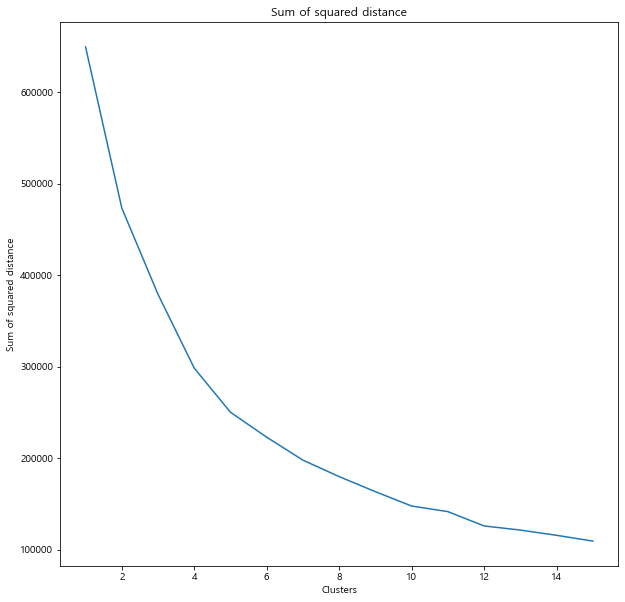

In [303]:
plt.figure(figsize = (10, 10))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

In [304]:
clus = KMeans(6,random_state=1234)
clus.fit(df_scaled)
cluster_kmeans = [i+1 for i in clus.labels_]
df_raw_dummy["ClusterKmeans"] = cluster_kmeans
df_raw_dummy.head()

,평균결제금액,주문횟수,체험팩수령횟수,최종구매시월령,성별_남,성별_여,결혼유무_기혼,결혼유무_미혼,연령대_20대,연령대_30대,연령대_40대,자녀여부_No,자녀여부_Yes,ClusterKmeans
0,27041.500000,2.0,0.0,14.0,0,1,1,0,0,1,0,0,1,1
2,47922.000000,1.0,0.0,66.0,0,1,1,0,0,1,0,0,1,1
3,58266.000000,2.0,0.0,8.0,0,1,0,1,0,1,0,1,0,2
6,26030.833333,6.0,2.0,18.0,0,1,1,0,0,1,0,0,1,5
7,26691.187500,16.0,1.0,19.0,0,1,1,0,0,1,0,0,1,5


In [305]:
df_raw_dummy.groupby(['ClusterKmeans']).count()[['주문횟수']]

,주문횟수
ClusterKmeans,
1,30621
2,7391
3,5274
4,581
5,4566
6,1522


In [306]:
ds_summary_km = df_raw_dummy.groupby("ClusterKmeans").agg(["mean"])
levels0 = ds_summary_km.columns.get_level_values(0)
levels1 = ds_summary_km.columns.get_level_values(1)

ds_summary_km.columns = levels0 + "_" + levels1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,평균결제금액_mean,주문횟수_mean,체험팩수령횟수_mean,최종구매시월령_mean,성별_남_mean,성별_여_mean,결혼유무_기혼_mean,결혼유무_미혼_mean,연령대_20대_mean,연령대_30대_mean,연령대_40대_mean,자녀여부_No_mean,자녀여부_Yes_mean
0,1,26364.168,2.000,0.129,16.702,0.00,1.00,1.000,0.000,0.000,1.000,0.0,0.044,0.956
1,2,26457.469,2.537,0.324,16.044,0.00,1.00,0.000,1.000,0.132,0.868,0.0,1.000,0.000
2,3,26224.766,2.471,0.300,16.897,0.00,1.00,1.000,0.000,1.000,0.000,0.0,0.054,0.946
3,4,26584.076,2.840,0.344,14.773,0.04,0.96,0.847,0.153,0.000,0.000,1.0,0.198,0.802
4,5,26272.000,7.316,1.723,13.847,0.00,1.00,0.997,0.003,0.010,0.990,0.0,0.049,0.951
5,6,26495.437,2.641,0.382,16.576,1.00,0.00,0.840,0.160,0.141,0.859,0.0,0.200,0.800


1그룹 - 여자,기혼,30대,자녀있음  
2그룹 - 여자,미혼,20대, 30대 섞여있음, 자녀 없음  
3그룹 - 여자,기혼,20대, 자녀 있음  
4그룹 - 여자, 기혼, 40대, 자녀 있음  
5그룹 - 여자, 주문횟수 높음 기혼, 30대, 자녀 있음  
6그룹 - 남자, 기혼, 2~30대, 자녀 있음  

=> 5그룹 선정

In [307]:
df_final1['평균결제금액'] = df_final2['평균결제금액']
df_final_2_new = df_class2.copy()
df_final_2_new["ClusterKmeans"] = cluster_kmeans
df_cluster = pd.merge(df_final1, df_final_2_new[['ID','ClusterKmeans']], left_on = '고객번호', right_on = 'ID', how = 'left')

## 연관규칙학습

In [308]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

def func1(row):
    return row != False 

In [310]:
# 1번 군집
df_cluster5 = df_cluster[df_cluster['ClusterKmeans'] == 5]
df_cluster5['주문횟수'] = 5
p1 = pd.pivot_table(df_cluster5, index='고객번호', values='주문횟수', columns='물품대분류')
p2 = p1.replace(np.nan , False)
p3 = p2.apply(func1)

In [311]:
df_freq = apriori(p3, min_support = 0.01 , use_colnames=True)
df_freq.round(3).sort_values(by=['support'], axis=0, ascending = False)

,support,itemsets
0,0.771,(['기저귀/팬티'])
6,0.530,(['출산/수유/이유'])
12,0.419,"(['출산/수유/이유'], ['기저귀/팬티'])"
3,0.344,(['생활/가정용품'])
4,0.295,(['아기용품'])
...,...,...
113,0.012,"(['아기용품'], ['생활/가정용품'], ['물티슈'], ['여성용품'], ['기..."
115,0.012,"(['생활/가정용품'], ['출산/수유/이유'], ['물티슈'], ['여성용품'],..."
123,0.012,"(['아기용품'], ['생활/가정용품'], ['출산/수유/이유'], ['물티슈'],..."
121,0.011,"(['아기용품'], ['출산/수유/이유'], ['물티슈'], ['여성용품'], ['..."


In [312]:
df_asso_rule = association_rules(df_freq, metric = 'confidence', min_threshold = 0.01)
df_asso_rule.round(3).sort_values(by=['lift','confidence'], axis=0, ascending = False)
# df_asso_rule[df_asso_rule['confidence'] > 0.5].round(3).sort_values(by=['lift','confidence'], axis=0, ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1527,"(['출산/수유/이유'], ['물티슈'], ['여성용품'])","(['기저귀/팬티'], ['아기용품'], ['기타'])",0.038,0.066,0.011,0.297,4.468,0.009,1.327
1526,"(['기저귀/팬티'], ['아기용품'], ['기타'])","(['출산/수유/이유'], ['물티슈'], ['여성용품'])",0.066,0.038,0.011,0.168,4.468,0.009,1.157
1199,"(['생활/가정용품'], ['아기용품'], ['기타'])","(['물티슈'], ['여성용품'])",0.045,0.064,0.012,0.279,4.384,0.010,1.299
1214,"(['물티슈'], ['여성용품'])","(['생활/가정용품'], ['아기용품'], ['기타'])",0.064,0.045,0.012,0.196,4.384,0.010,1.188
1383,"(['생활/가정용품'], ['기저귀/팬티'], ['아기용품'], ['기타'])","(['출산/수유/이유'], ['물티슈'])",0.033,0.105,0.015,0.461,4.381,0.012,1.659
...,...,...,...,...,...,...,...,...,...
446,(['기저귀/팬티']),"(['물티슈'], ['여성용품'], ['아기용품'])",0.771,0.036,0.025,0.033,0.909,-0.003,0.997
477,"(['생활/가정용품'], ['여성용품'], ['아기용품'])",(['기저귀/팬티']),0.053,0.771,0.036,0.692,0.897,-0.004,0.742
488,(['기저귀/팬티']),"(['생활/가정용품'], ['여성용품'], ['아기용품'])",0.771,0.053,0.036,0.047,0.897,-0.004,0.994
1042,"(['생활/가정용품'], ['여성용품'], ['물티슈'], ['아기용품'])",(['기저귀/팬티']),0.025,0.771,0.016,0.646,0.838,-0.003,0.646


In [313]:
df_class2['ClusterKmeans'] = df_raw_dummy['ClusterKmeans']

In [314]:
df_class2

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,구매금액,결제금액,주문횟수,체험팩수령횟수,연령대,최종구매시월령,평균결제금액,ClusterKmeans
0,201812310749735,여,기혼,인천,37,국민은행,인스타그램,Yes,77000.0,54083.0,2.0,0.0,30대,14.0,27041.500000,1
2,201812310749771,여,기혼,부산,32,하나은행,네이버블로그,Yes,59520.0,47922.0,1.0,0.0,30대,66.0,47922.000000,1
3,201812310749774,여,미혼,경남,34,기업은행,지인추천,No,151920.0,116532.0,2.0,0.0,30대,8.0,58266.000000,2
6,201812310749784,여,기혼,충북,33,국민은행,네이버블로그,Yes,258900.0,156185.0,6.0,2.0,30대,18.0,26030.833333,5
7,201812310749787,여,기혼,광주,35,BC카드,네이버블로그,Yes,650360.0,427059.0,16.0,1.0,30대,19.0,26691.187500,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79298,201912181051547,여,기혼,서울,40,신한은행,인스타그램,Yes,26800.0,20285.0,2.0,0.0,40대,11.0,10142.500000,4
79299,201912181051548,여,기혼,충남,34,광주은행,인스타그램,Yes,25800.0,16987.0,2.0,0.0,30대,6.0,8493.500000,1
79300,201912181051549,여,기혼,경기,33,농협중앙회,인스타그램,Yes,31620.0,10275.0,1.0,0.0,30대,46.0,10275.000000,1
79303,201912181051577,여,기혼,서울,38,롯데카드,인스타그램,Yes,45000.0,26100.0,1.0,0.0,30대,63.0,26100.000000,1


In [315]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import StandardScaler

# 로지스틱 분석 패키지
from statsmodels.api import Logit

# 평가 함수
from sklearn.metrics import accuracy_score

# confusion matrix
from sklearn.metrics import confusion_matrix

In [316]:
df_class2.groupby('ClusterKmeans').count()

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,구매금액,결제금액,주문횟수,체험팩수령횟수,연령대,최종구매시월령,평균결제금액
ClusterKmeans,,,,,,,,,,,,,,,
1,30621,30621,30621,30621,30621,30621,30621,30621,30621,30621,30621,30621,30621,30621,30621
2,7391,7391,7391,7391,7391,7391,7391,7391,7391,7391,7391,7391,7391,7391,7391
3,5274,5274,5274,5274,5274,5274,5274,5274,5274,5274,5274,5274,5274,5274,5274
4,581,581,581,581,581,581,581,581,581,581,581,581,581,581,581
5,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566
6,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522


In [317]:
df_class2['Target'] = np.where(df_class2['ClusterKmeans'] == 5, 1, 0)

In [318]:
df_class3 = df_class2.copy()
df_class3.drop(['ID', '구매금액', '결제등록카드', '유입경로', '거주지역','결제금액', '연령대', 'ClusterKmeans'], axis = 1, inplace = True)
df_class3['재구매여부'] = np.where(df_class3['주문횟수']>=2, '1', '0')
df_class3['체험팩수령여부'] = np.where(df_class3['체험팩수령횟수']>=1, '1', '0')

In [319]:
df_class3.head()

,성별,결혼유무,연령,자녀여부,주문횟수,체험팩수령횟수,최종구매시월령,평균결제금액,Target,재구매여부,체험팩수령여부
0,여,기혼,37,Yes,2.0,0.0,14.0,27041.500000,0,1,0
2,여,기혼,32,Yes,1.0,0.0,66.0,47922.000000,0,0,0
3,여,미혼,34,No,2.0,0.0,8.0,58266.000000,0,1,0
6,여,기혼,33,Yes,6.0,2.0,18.0,26030.833333,1,1,1
7,여,기혼,35,Yes,16.0,1.0,19.0,26691.187500,1,1,1


In [320]:
df_class3 = df_class3[['연령', '최종구매시월령', '평균결제금액', '재구매여부', '체험팩수령여부', 'Target']]

In [321]:
df_raw_dummy = pd.get_dummies(df_class3)
df_raw_dummy.head()

,연령,최종구매시월령,평균결제금액,Target,재구매여부_0,재구매여부_1,체험팩수령여부_0,체험팩수령여부_1
0,37,14.0,27041.500000,0,0,1,1,0
2,32,66.0,47922.000000,0,1,0,1,0
3,34,8.0,58266.000000,0,0,1,1,0
6,33,18.0,26030.833333,1,0,1,0,1
7,35,19.0,26691.187500,1,0,1,0,1


In [322]:
df_raw_y = df_raw_dummy["Target"]
df_raw_x = df_raw_dummy.drop("Target", axis = 1, inplace = False)

In [323]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_x.shape))

train data X size : (34968, 7)
train data Y size : (34968,)
test data X size : (14987, 7)
test data Y size : (14987, 7)


## DT

In [324]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

matplotlib.rc("font", family = "Malgun Gothic")

In [325]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set {:3f}:".format(tree_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set {:3f}:".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set 0.999113:
Score on test set 0.891706:


In [326]:
train_accuracy = []
test_accuracy = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234
                                 , max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    

# 결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Max_depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Max_depth,TrainAccuracy,TestAccuracy
0,1,0.908,0.910
1,2,0.908,0.910
2,3,0.908,0.910
3,4,0.918,0.918
4,5,0.919,0.920
5,6,0.921,0.921
6,7,0.922,0.922
7,8,0.923,0.922
8,9,0.925,0.921
9,10,0.928,0.918


In [327]:
train_accuracy = []
test_accuracy = []

para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, 
                                  max_depth = 7,
                                 min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    

# 결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["MinSamplesSplit"] = para_split
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

df_accuracy_depth.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.922,0.922
1,20,0.922,0.922
2,30,0.922,0.922
3,40,0.922,0.922
4,50,0.922,0.922
5,60,0.922,0.922
6,70,0.922,0.922
7,80,0.922,0.922
8,90,0.922,0.922
9,100,0.922,0.922


In [328]:
train_accuracy = []
test_accuracy = []

para_leaf = [n_leaf * 2 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state=1234, 
                                  max_depth = 7,
                                 min_samples_split = 10,
                                 min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    

# 결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["MinSamplesSplit"] = para_leaf
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

df_accuracy_depth.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,2,0.922,0.922
1,4,0.922,0.922
2,6,0.922,0.922
3,8,0.922,0.922
4,10,0.922,0.922
5,12,0.922,0.922
6,14,0.922,0.922
7,16,0.922,0.922
8,18,0.922,0.922
9,20,0.922,0.922


In [329]:
tree_final = DecisionTreeClassifier(random_state = 1234, max_depth = 7, 
                                    min_samples_leaf = 10, min_samples_split = 2)
tree_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set {:3f}:".format(tree_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set {:3f}:".format(tree_final.score(df_test_x, df_test_y)))

Score on training set 0.922043:
Score on test set 0.921799:


In [330]:
y_pred_dt = tree_final.predict(df_test_x)

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred_dt)))
print(classification_report(df_test_y, y_pred_dt, digits = 3))

Confusion matrix: 
[[13231   400]
 [  772   584]]
              precision    recall  f1-score   support

           0      0.945     0.971     0.958     13631
           1      0.593     0.431     0.499      1356

    accuracy                          0.922     14987
   macro avg      0.769     0.701     0.728     14987
weighted avg      0.913     0.922     0.916     14987



## RF

In [331]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

matplotlib.rc("font", family = "Malgun Gothic")

In [332]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Accuracy on training set {:.3f}:".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Accuracy on test set {:.3f}:".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set 0.999:
Accuracy on test set 0.909:


In [333]:
train_score = []
test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_n_tree = [10, 50, 100, 150, 200]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state=1234,
                                 n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.990,0.908
1,50,0.999,0.909
2,100,0.999,0.909
3,150,0.999,0.909
4,200,0.999,0.910


In [334]:
train_score = []
test_score = [ ]

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state=1234, n_estimators = 100,
                               max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.908,0.910
1,2,0.908,0.910
2,3,0.908,0.910
3,4,0.921,0.923
4,5,0.921,0.924
5,6,0.922,0.923
6,7,0.923,0.923
7,8,0.924,0.923
8,9,0.927,0.922
9,10,0.929,0.923


In [335]:
train_score = []
test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state=1234, n_estimators = 100, max_depth = 7,
                              min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.923,0.924
1,6,0.923,0.924
2,8,0.923,0.924
3,10,0.923,0.924
4,12,0.924,0.923
5,14,0.923,0.923
6,16,0.923,0.923
7,18,0.923,0.923
8,20,0.923,0.923
9,22,0.924,0.922


In [336]:
train_score = []
test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_tree * 1 for n_tree in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state=1234, n_estimators = 100, max_depth = 7, 
                                min_samples_split = 4, min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.923,0.924
1,2,0.924,0.923
2,3,0.924,0.923
3,4,0.924,0.922
4,5,0.924,0.923
5,6,0.924,0.923
6,7,0.924,0.923
7,8,0.923,0.923
8,9,0.924,0.923
9,10,0.924,0.923


In [337]:
# 최종모델
rf_final = RandomForestClassifier(random_state=1234, n_estimators = 100, max_depth = 7, 
                                min_samples_split = 4, min_samples_leaf = 4)
rf_final.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Accuracy on training set: 0.924
Accuracy on test set: 0.922


In [338]:
y_pred_rf = rf_final.predict(df_test_x)

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred_rf)))
print(classification_report(df_test_y, y_pred_rf, digits = 3))

Confusion matrix: 
[[13182   449]
 [  715   641]]
              precision    recall  f1-score   support

           0      0.949     0.967     0.958     13631
           1      0.588     0.473     0.524      1356

    accuracy                          0.922     14987
   macro avg      0.768     0.720     0.741     14987
weighted avg      0.916     0.922     0.918     14987



## GB

In [339]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


matplotlib.rc("font", family = "Malgun Gothic")

In [340]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_x.shape))

train data X size : (34968, 7)
train data Y size : (34968,)
test data X size : (14987, 7)
test data Y size : (14987, 7)


In [341]:
gb_uncustomized = GradientBoostingClassifier(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Accuracy on training set {:3f}:".format(gb_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Accuracy on test set {:3f}:".format(gb_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set 0.923559:
Accuracy on test set 0.924201:


In [342]:
train_score = []
test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(random_state = 1234,
                                   learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.924,0.924
1,0.2,0.926,0.924
2,0.3,0.929,0.922
3,0.4,0.930,0.922
4,0.5,0.931,0.923
5,0.6,0.932,0.920
6,0.7,0.933,0.919
7,0.8,0.931,0.922
8,0.9,0.931,0.915


In [343]:
train_score = []
test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_n_tree = [n_tree * 10 for n_tree in range(1, 21)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(random_state=1234, learning_rate = 0.1,
                                 n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.908,0.910
1,20,0.919,0.920
2,30,0.922,0.924
3,40,0.922,0.924
4,50,0.923,0.924
5,60,0.923,0.924
6,70,0.923,0.924
7,80,0.923,0.924
8,90,0.923,0.924
9,100,0.924,0.924


In [344]:
train_score = []
test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(random_state=1234, n_estimators = 100, learning_rate = 0.1, 
                                   max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.922,0.924
1,2,0.922,0.924
2,3,0.924,0.924
3,4,0.926,0.924
4,5,0.928,0.924
5,6,0.932,0.923
6,7,0.937,0.922
7,8,0.946,0.921
8,9,0.954,0.919
9,10,0.969,0.916


In [345]:
train_score = []
test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_split = [n_split * 10 for n_split in range(2, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(random_state=1234, n_estimators = 100, learning_rate = 0.1, 
                                    max_depth = 3, min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,20,0.924,0.924
1,30,0.924,0.924
2,40,0.924,0.924
3,50,0.924,0.924
4,60,0.924,0.924
5,70,0.924,0.924
6,80,0.924,0.924
7,90,0.923,0.924
8,100,0.923,0.924


In [346]:
train_score = []
test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(random_state=1234, n_estimators = 100, 
                                    learning_rate = 0.1, max_depth = 3, 
                                    min_samples_split = 20, min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.924,0.924
1,2,0.924,0.924
2,3,0.923,0.924
3,4,0.923,0.924
4,5,0.924,0.924
5,6,0.924,0.924
6,7,0.924,0.924
7,8,0.923,0.924
8,9,0.923,0.925
9,10,0.923,0.925


In [347]:
# 최종모델
gb_final = GradientBoostingClassifier(random_state=1234, n_estimators = 100, 
                                    learning_rate = 0.1, max_depth = 3, 
                                    min_samples_split = 20, min_samples_leaf = 1)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.924
Score on test set: 0.924


## 모델평가

In [348]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc

In [349]:
model = ['DecisionTree', 'RandomForest', 'GradientBoosting']

train_accuracy = []
test_accuracy = []
model_auc = []
model_precision = []
model_recall = []
model_f1_score = []

## DT

In [350]:
# 최종모델1
tree_final = DecisionTreeClassifier(random_state = 1234, max_depth = 9, min_samples_leaf = 80, 
                                    min_samples_split = 12)
tree_final.fit(df_train_x, df_train_y)

train_accuracy.append(tree_final.score(df_train_x, df_train_y))
test_accuracy.append(tree_final.score(df_test_x, df_test_y))

y_pred = tree_final.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

In [351]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

## RF

In [352]:
# 최종모델1
rf_final = RandomForestClassifier(random_state=1234, n_estimators = 100, max_depth = 10, 
                                  min_samples_split = 32, min_samples_leaf = 13)
rf_final.fit(df_train_x, df_train_y)

train_accuracy.append(rf_final.score(df_train_x, df_train_y))
test_accuracy.append(rf_final.score(df_test_x, df_test_y))

y_pred = rf_final.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

In [353]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

## GB

In [354]:
gb_final = GradientBoostingClassifier(random_state=1234, n_estimators = 170, learning_rate = 0.8, max_depth = 3,
                              min_samples_split = 100, min_samples_leaf = 7)
gb_final.fit(df_train_x, df_train_y)

train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

y_pred = gb_final.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

In [355]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

## 모델비교

In [356]:
df_eval = pd.DataFrame(index = model)
df_eval["TrainAccuracy"] = train_accuracy
df_eval["TestAccuracy"] = test_accuracy
df_eval['AUC'] = model_auc
df_eval["Precision"] = model_precision
df_eval["Recall"] = model_recall
df_eval["F1 Score"] = model_f1_score
df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1 Score
DecisionTree,0.923,0.922,0.698,0.595,0.426,0.496
RandomForest,0.927,0.923,0.708,0.601,0.446,0.512
GradientBoosting,0.938,0.917,0.687,0.558,0.406,0.470


# 재구매 예측 모델 확인

## 전처리

In [357]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import StandardScaler

# 로지스틱 분석 패키지
from statsmodels.api import Logit

# 평가 함수
from sklearn.metrics import accuracy_score

# confusion matrix
from sklearn.metrics import confusion_matrix

In [358]:
df_rebuy = df_final2.copy()

In [359]:
df_rebuy.dropna(axis = 0, inplace = True)

In [360]:
df_rebuy.isnull().sum()

ID         0
성별         0
결혼유무       0
거주지역       0
연령         0
결제등록카드     0
유입경로       0
자녀여부       0
구매금액       0
결제금액       0
주문횟수       0
체험팩수령횟수    0
연령대        0
최종구매시월령    0
평균결제금액     0
dtype: int64

In [361]:
df_rebuy.shape

(49955, 15)

In [362]:
df_rebuy['최종구매시월령'].fillna(0, inplace = True)
df_rebuy['평균결제금액'].fillna(0, inplace = True)

In [363]:
df_for_merge = df_final1.groupby(['고객번호']).mean()[['배송시간']]

In [364]:
df_rebuy2 = pd.merge(df_rebuy, df_for_merge, left_on = 'ID', right_on = '고객번호', how = 'left')

In [365]:
df_rebuy2['평균할인금액'] = ((df_rebuy2['구매금액'] - df_rebuy2['결제금액']) / df_rebuy2['주문횟수']).round()
df_rebuy2['평균할인금액'].fillna(0, inplace = True)

In [366]:
df_rebuy2.head()

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,구매금액,결제금액,주문횟수,체험팩수령횟수,연령대,최종구매시월령,평균결제금액,배송시간,평균할인금액
0,201812310749735,여,기혼,인천,37,국민은행,인스타그램,Yes,77000.0,54083.0,2.0,0.0,30대,14.0,27041.500000,3.0,11458.0
1,201812310749771,여,기혼,부산,32,하나은행,네이버블로그,Yes,59520.0,47922.0,1.0,0.0,30대,66.0,47922.000000,2.0,11598.0
2,201812310749774,여,미혼,경남,34,기업은행,지인추천,No,151920.0,116532.0,2.0,0.0,30대,8.0,58266.000000,2.5,17694.0
3,201812310749784,여,기혼,충북,33,국민은행,네이버블로그,Yes,258900.0,156185.0,6.0,2.0,30대,18.0,26030.833333,2.5,17119.0
4,201812310749787,여,기혼,광주,35,BC카드,네이버블로그,Yes,650360.0,427059.0,16.0,1.0,30대,19.0,26691.187500,2.0,13956.0


In [367]:
df_rebuy3 = df_rebuy2.drop(['ID', '구매금액', '결제금액'], axis = 1)
df_rebuy3['재구매여부'] = np.where(df_rebuy3['주문횟수']>=2, '1', '0')

In [368]:
df_rebuy3.groupby('재구매여부').count()

,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,주문횟수,체험팩수령횟수,연령대,최종구매시월령,평균결제금액,배송시간,평균할인금액
재구매여부,,,,,,,,,,,,,,
0,24789,24789,24789,24789,24789,24789,24789,24789,24789,24789,24789,24789,24789,24789
1,25166,25166,25166,25166,25166,25166,25166,25166,25166,25166,25166,25166,25166,25166


In [369]:
df_rebuy3['재구매여부'] = df_rebuy3['재구매여부'].astype(int)

In [370]:
df_train, df_test = train_test_split(df_rebuy3, test_size = 0.3, random_state = 1234)

print("train data shape: ", df_train.shape)
print("test data shape: ", df_test.shape)

train data shape:  (34968, 15)
test data shape:  (14987, 15)


## logistic

In [371]:
# from_formula 함수를 이용하여 변수 역할 지정
# 분석 대상 이벤트 = “1”
log_model = Logit.from_formula("""재구매여부 ~ C(성별) + C(결혼유무) + C(거주지역) +\
                                연령 + C(결제등록카드) + C(유입경로) + C(자녀여부) + \
                                체험팩수령횟수 + 최종구매시월령 + 평균결제금액 + \
                                배송시간 + 평균할인금액""", df_train)

# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.678499
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  재구매여부   No. Observations:                34968
Model:                          Logit   Df Residuals:                    34912
Method:                           MLE   Df Model:                           55
Date:                Sun, 28 May 2023   Pseudo R-squ.:                 0.02105
Time:                        23:23:21   Log-Likelihood:                -23726.
converged:                       True   LL-Null:                       -24236.
Covariance Type:            nonrobust   LLR p-value:                7.884e-178
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.1759      0.173     -1.018      0.309      -0.514       0.163
C(

In [372]:
y_pred = log_result.predict(df_test)
y_pred.head()

3148     0.403151
4110     0.955244
41528    0.607378
11391    0.482134
3341     0.478739
dtype: float64

In [373]:
# test 데이터 예측
y_pred = log_result.predict(df_test)

# 0과 1의 값을 가진 class로 변환
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

3148     0
4110     1
41528    1
11391    0
3341     0
dtype: int32

In [374]:
print(y_pred_class.count())
a_0 = y_pred_class == 0
print(a_0.sum())
a_1 = y_pred_class == 1
print(a_1.sum())

14987
9782
5205


In [375]:
# 실제 test 데이터의 목표변수와 test 데이터의 예측값 비교
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["재구매여부"], y_pred_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["재구매여부"], y_pred_class)))

Accuracy: 0.556

Confusion Matrix: 
[[5310 2185]
 [4472 3020]]


## DT

In [376]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

matplotlib.rc("font", family = "Malgun Gothic")

In [377]:
df_raw_dummy = pd.get_dummies(df_rebuy3)
df_raw_dummy.head()

,연령,주문횟수,체험팩수령횟수,최종구매시월령,평균결제금액,배송시간,평균할인금액,재구매여부,성별_남,성별_여,결혼유무_기혼,결혼유무_미혼,거주지역_강원,거주지역_경기,거주지역_경남,거주지역_경북,거주지역_광주,거주지역_대구,거주지역_대전,거주지역_부산,거주지역_서울,거주지역_인천,거주지역_전남,거주지역_전북,거주지역_제주,...,결제등록카드_새마을금고,결제등록카드_신한은행,결제등록카드_신한카드,결제등록카드_신협중앙회,결제등록카드_씨티은행,결제등록카드_외환은행,결제등록카드_우리은행,결제등록카드_우체국,결제등록카드_하나은행,결제등록카드_현대카드,유입경로_검색광고,유입경로_네이버블로그,유입경로_네이버카페,유입경로_매장쿠폰,유입경로_오픈마켓,유입경로_이마트,유입경로_인스타그램,유입경로_지인추천,유입경로_직접검색,유입경로_페이스북,자녀여부_No,자녀여부_Yes,연령대_20대,연령대_30대,연령대_40대
0,37,2.0,0.0,14.0,27041.500000,3.0,11458.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,32,1.0,0.0,66.0,47922.000000,2.0,11598.0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2,34,2.0,0.0,8.0,58266.000000,2.5,17694.0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,33,6.0,2.0,18.0,26030.833333,2.5,17119.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
4,35,16.0,1.0,19.0,26691.187500,2.0,13956.0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [378]:
df_raw_y = df_raw_dummy["재구매여부"]
df_raw_x = df_raw_dummy.drop(["주문횟수", "재구매여부"], axis = 1, inplace = False)

In [379]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_x.shape))

train data X size : (34968, 64)
train data Y size : (34968,)
test data X size : (14987, 64)
test data Y size : (14987, 64)


In [380]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set {:3f}:".format(tree_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set {:3f}:".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set 1.000000:
Score on test set 0.790218:


In [381]:
train_accuracy = []
test_accuracy = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234
                                 , max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    

# 결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Max_depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Max_depth,TrainAccuracy,TestAccuracy
0,1,0.673,0.663
1,2,0.755,0.751
2,3,0.755,0.751
3,4,0.772,0.771
4,5,0.776,0.775
5,6,0.779,0.775
6,7,0.782,0.780
7,8,0.796,0.778
8,9,0.812,0.793
9,10,0.825,0.794


In [382]:
train_accuracy = []
test_accuracy = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234
                                 , max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    

# 결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Max_depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Max_depth,TrainAccuracy,TestAccuracy
0,1,0.673,0.663
1,2,0.755,0.751
2,3,0.755,0.751
3,4,0.772,0.771
4,5,0.776,0.775
5,6,0.779,0.775
6,7,0.782,0.780
7,8,0.796,0.778
8,9,0.812,0.793
9,10,0.825,0.794


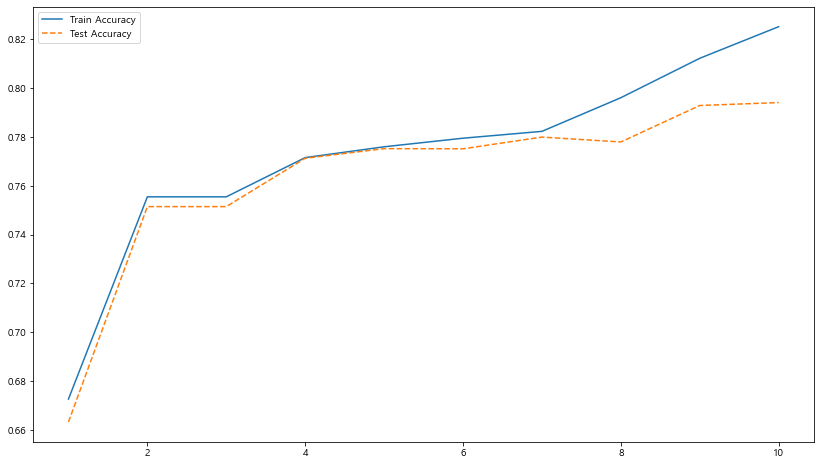

In [383]:
plt.rcParams["figure.figsize"] = (14,8)
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()
plt.show()

In [384]:
train_accuracy = []
test_accuracy = []

para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, 
                                  max_depth = 9,
                                 min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    

# 결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["MinSamplesSplit"] = para_split
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

df_accuracy_depth.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.812,0.794
1,20,0.811,0.793
2,30,0.811,0.794
3,40,0.810,0.793
4,50,0.810,0.792
5,60,0.810,0.792
6,70,0.809,0.794
7,80,0.809,0.794
8,90,0.809,0.794
9,100,0.808,0.794


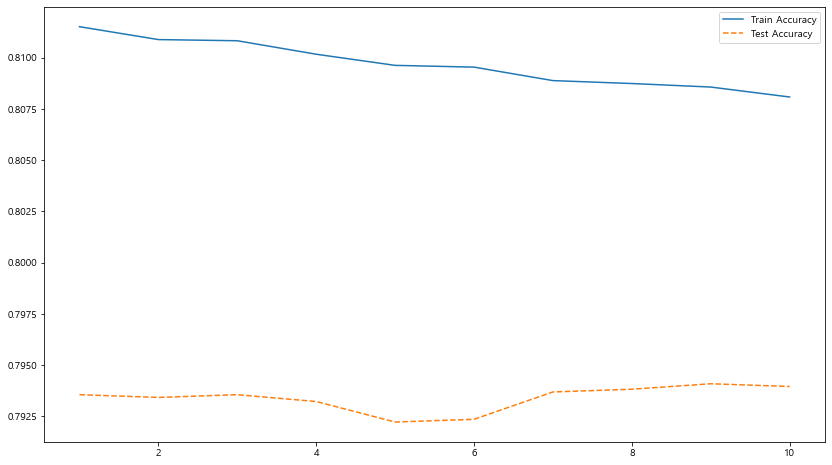

In [385]:
plt.rcParams["figure.figsize"] = (14,8)
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()
plt.show()

In [386]:
train_accuracy = []
test_accuracy = []

para_leaf = [n_leaf * 2 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state=1234, 
                                  max_depth = 9,
                                 min_samples_split = 80,
                                 min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    

# 결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["MinSamplesSplit"] = para_leaf
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

df_accuracy_depth.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,2,0.809,0.794
1,4,0.808,0.794
2,6,0.808,0.794
3,8,0.808,0.795
4,10,0.808,0.795
5,12,0.807,0.795
6,14,0.807,0.796
7,16,0.807,0.794
8,18,0.807,0.795
9,20,0.807,0.795


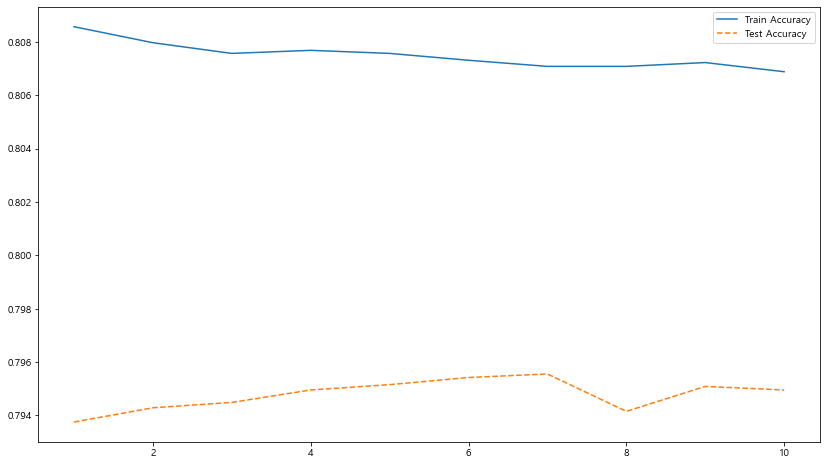

In [387]:
plt.rcParams["figure.figsize"] = (14,8)
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()
plt.show()

# 17 ~ 18 정도 잡으면 될듯. 18로 함.

In [388]:
tree_final = DecisionTreeClassifier(random_state = 1234, max_depth = 9, min_samples_leaf = 80, 
                                    min_samples_split = 12)
tree_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set {:.3f}:".format(tree_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set {:.3f}:".format(tree_final.score(df_test_x, df_test_y)))

Score on training set 0.803:
Score on test set 0.792:


In [389]:
y_pred_dt = tree_final.predict(df_test_x)

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred_dt)))
print(classification_report(df_test_y, y_pred_dt, digits = 3))

Confusion matrix: 
[[6899  596]
 [2518 4974]]
              precision    recall  f1-score   support

           0      0.733     0.920     0.816      7495
           1      0.893     0.664     0.762      7492

    accuracy                          0.792     14987
   macro avg      0.813     0.792     0.789     14987
weighted avg      0.813     0.792     0.789     14987



## RF

In [390]:
from sklearn.ensemble import RandomForestClassifier

In [391]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Accuracy on training set {:.3f}:".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Accuracy on test set {:.3f}:".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set 1.000:
Accuracy on test set 0.794:


In [392]:
train_score = []
test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_n_tree = [10, 50, 100, 150, 200]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state=1234,
                                 n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.988,0.774
1,50,1.000,0.789
2,100,1.000,0.794
3,150,1.000,0.796
4,200,1.000,0.797


In [393]:
train_score = []
test_score = [ ]

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state=1234, n_estimators = 100,
                               max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.675,0.665
1,2,0.706,0.699
2,3,0.718,0.712
3,4,0.726,0.723
4,5,0.735,0.732
5,6,0.741,0.736
6,7,0.743,0.737
7,8,0.757,0.747
8,9,0.768,0.752
9,10,0.771,0.755


In [394]:
train_score = []
test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state=1234, n_estimators = 100, max_depth = 10,
                              min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.778,0.762
1,6,0.778,0.759
2,8,0.783,0.764
3,10,0.788,0.768
4,12,0.782,0.765
5,14,0.773,0.760
6,16,0.776,0.759
7,18,0.776,0.761
8,20,0.777,0.762
9,22,0.773,0.759


In [395]:
train_score = []
test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_tree * 1 for n_tree in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state=1234, n_estimators = 100, max_depth = 10, 
                                min_samples_split = 32, min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.773,0.760
1,2,0.775,0.762
2,3,0.773,0.762
3,4,0.768,0.756
4,5,0.777,0.766
5,6,0.766,0.757
6,7,0.767,0.757
7,8,0.764,0.752
8,9,0.778,0.765
9,10,0.777,0.765


In [396]:
# 최종모델
rf_final = RandomForestClassifier(random_state=1234, n_estimators = 100, max_depth = 10, 
                                  min_samples_split = 32, min_samples_leaf = 13)
rf_final.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Accuracy on training set: 0.776
Accuracy on test set: 0.764


In [397]:
y_pred_rf = rf_final.predict(df_test_x)

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred_rf)))
print(classification_report(df_test_y, y_pred_rf, digits = 3))

Confusion matrix: 
[[6785  710]
 [2830 4662]]
              precision    recall  f1-score   support

           0      0.706     0.905     0.793      7495
           1      0.868     0.622     0.725      7492

    accuracy                          0.764     14987
   macro avg      0.787     0.764     0.759     14987
weighted avg      0.787     0.764     0.759     14987



## GB

In [398]:
from sklearn.ensemble import GradientBoostingClassifier

In [399]:
gb_uncustomized = GradientBoostingClassifier(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Accuracy on training set {:3f}:".format(gb_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Accuracy on test set {:3f}:".format(gb_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set 0.810713:
Accuracy on test set 0.803029:


In [400]:
train_score = []
test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(random_state = 1234,
                                   learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.811,0.803
1,0.2,0.830,0.814
2,0.3,0.838,0.820
3,0.4,0.851,0.826
4,0.5,0.857,0.829
5,0.6,0.864,0.837
6,0.7,0.868,0.835
7,0.8,0.869,0.843
8,0.9,0.872,0.833


In [401]:
train_score = []
test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_n_tree = [n_tree * 10 for n_tree in range(1, 21)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(random_state=1234, learning_rate = 0.1,
                                 n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.755,0.751
1,20,0.765,0.764
2,30,0.786,0.782
3,40,0.794,0.790
4,50,0.796,0.792
5,60,0.801,0.797
6,70,0.802,0.797
7,80,0.806,0.800
8,90,0.808,0.802
9,100,0.811,0.803


In [402]:
train_score = []
test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(random_state=1234, n_estimators = 40, learning_rate = 0.1, 
                                   max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.755,0.751
1,2,0.776,0.773
2,3,0.794,0.790
3,4,0.801,0.796
4,5,0.810,0.802
5,6,0.826,0.810
6,7,0.840,0.815
7,8,0.858,0.820
8,9,0.883,0.822
9,10,0.907,0.829


In [403]:
train_score = []
test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_split = [n_split * 10 for n_split in range(2, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(random_state=1234, n_estimators = 40, learning_rate = 0.1, max_depth = 3,
                              min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,20,0.794,0.79
1,30,0.794,0.79
2,40,0.794,0.79
3,50,0.794,0.79
4,60,0.794,0.79
5,70,0.794,0.79
6,80,0.794,0.79
7,90,0.794,0.79
8,100,0.794,0.79


In [404]:
train_score = []
test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(random_state=1234, n_estimators = 40, learning_rate = 0.1, max_depth = 3,
                              min_samples_split = 70, min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.794,0.79
1,2,0.794,0.79
2,3,0.794,0.79
3,4,0.794,0.79
4,5,0.794,0.79
5,6,0.794,0.79
6,7,0.794,0.79
7,8,0.794,0.79
8,9,0.794,0.79
9,10,0.794,0.79


In [405]:
# 최종모델
gb_final = GradientBoostingClassifier(random_state=1234, n_estimators = 40, learning_rate = 0.1, max_depth = 3,
                              min_samples_split = 70, min_samples_leaf = 4)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.794
Score on test set: 0.790


## 모델평가

In [406]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc

In [407]:
model = ['DecisionTree', 'RandomForest', 'GradientBoosting']

train_accuracy = []
test_accuracy = []
model_auc = []
model_precision = []
model_recall = []
model_f1_score = []

In [408]:
# 최종모델1
tree_final = DecisionTreeClassifier(random_state = 1234, max_depth = 9, min_samples_leaf = 80, 
                                    min_samples_split = 12)
tree_final.fit(df_train_x, df_train_y)

train_accuracy.append(tree_final.score(df_train_x, df_train_y))
test_accuracy.append(tree_final.score(df_test_x, df_test_y))

y_pred = tree_final.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

In [409]:
# 최종모델2
rf_final = RandomForestClassifier(random_state=1234, n_estimators = 100, max_depth = 10, 
                                  min_samples_split = 32, min_samples_leaf = 13)
rf_final.fit(df_train_x, df_train_y)

train_accuracy.append(rf_final.score(df_train_x, df_train_y))
test_accuracy.append(rf_final.score(df_test_x, df_test_y))

y_pred = rf_final.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

In [410]:
# 최종모델3
gb_final = GradientBoostingClassifier(random_state=1234, n_estimators = 50, learning_rate = 0.1, max_depth = 3,
                              min_samples_split = 70, min_samples_leaf = 4)
gb_final.fit(df_train_x, df_train_y)

train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

y_pred = gb_final.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

In [411]:
df_eval = pd.DataFrame(index = model)
df_eval["TrainAccuracy"] = train_accuracy
df_eval["TestAccuracy"] = test_accuracy
df_eval['AUC'] = model_auc
df_eval["Precision"] = model_precision
df_eval["Recall"] = model_recall
df_eval["F1 Score"] = model_f1_score
df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1 Score
DecisionTree,0.803,0.792,0.792,0.893,0.664,0.762
RandomForest,0.776,0.764,0.764,0.868,0.622,0.725
GradientBoosting,0.796,0.792,0.792,0.943,0.622,0.749


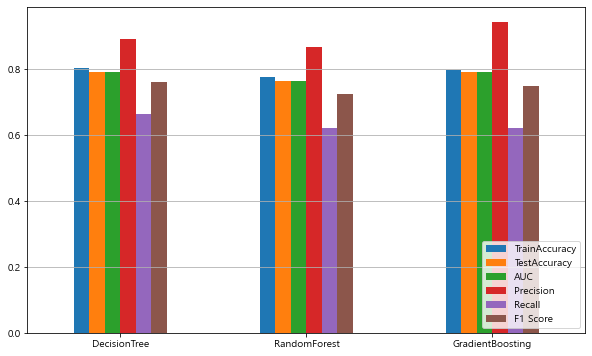

In [412]:
df_eval.plot.bar(rot = 0, figsize = (10, 6))
plt.legend(loc = "lower right")
plt.grid(axis = "y")

# 배송

In [413]:
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#scaling
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# 랜덤포레스트 분류기
# from sklearn.ensemble import RandomForestClassifier

# 모델 성능 평가
# from sklearn.metrics import confusion_matrix

#자기상관 함수, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as tsa

# 카이제곱 검정 (동일성 검정)
from scipy import stats

# shapiro 검정 (정규성 검정)
from scipy.stats import shapiro

# bartlett 검정 (정규성 만족하고 다집단일 때의 등분산성 검정)
from scipy.stats import bartlett

# levene 검정 (정규성 만족 못 할 때의 등분산성 검정)
from scipy.stats import levene

import itertools

# 시계열 분석
# from fbprophet import Prophet


matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rc("font", family = "NanumGothic")

## 배송지연 관련 파생변수

- ### 배송지연여부 

일단은 배송시간에 주말이 포함되지 않은 경우 중, 2일 초과로 걸린 경우를 배송지연으로 보기로 했다.

In [414]:
condition = (df_final1["배송주말포함여부"] == 0) & (df_final1["배송시간"] != 2)

df_final1.loc[condition,"배송지연여부"] = 1
df_final1["배송지연여부"].fillna(0,inplace=True)

df_final1["배송지연여부"] = df_final1["배송지연여부"].astype(int)

In [415]:
df_final1.head(3)

,주문번호,구매일,배송시작일,배송완료일,최종구매시월령,고객번호,구매금액,결제금액,상품명,상품준비시간,배송시간,연도,월,요일,주차,배송주말포함여부,분기,주말,계절,할인금액,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,물품대분류,배송지연여부_주말,평균결제금액,배송지연여부
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,4,2019,5,0,19,0,2분기,0,봄,9486,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes,['출산/수유/이유'],0,27041.5,1
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,2,2020,2,3,8,0,1분기,0,겨울,13431,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes,['기저귀/팬티'],0,3800.0,0
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,크리넥스？키즈용？화장지？3겹？27m 8롤,1,4,2019,2,3,9,1,1분기,0,겨울,1810,2.018123e+14,여,기혼,제주,33.0,국민은행,검색광고,Yes,['생활/가정용품'],1,47922.0,0


# 그래프 분석

### 배송지연여부 비율

<AxesSubplot:>

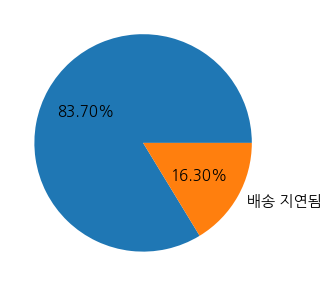

In [416]:
df_final1_deliDelay_count = df_final1.groupby(["배송지연여부"]).size()
df_final1_deliDelay_count.plot.pie(autopct="%.2f%%",labels=["","배송 지연됨"],figsize=(5,5),textprops={'fontsize': 15},label="")

전체 데이터 중 **약 16%**가 배송 지연된 상태이다. 보통의 온라인 쇼핑몰이 **4%를 임계점**으로 설정하는 것을 보면, 이는 **굉장히 높은 수치이다.**  
(다른 쇼핑몰이 정의하는 배송지연이 어떠한지에 따라 해석이 달라질 수는 있다.)

In [417]:
len(df_final1[df_final1["배송지연여부"] == 1])

26572

### 배송지연 되는 것 중 거주지역 분포

In [418]:
df_count_area1 = df_final1.loc[(df_final1.배송지연여부 == 1)].groupby(["거주지역"]).size().sort_values(ascending=False)
df_count_area1

거주지역
경기    5086
서울    4314
충북    2746
부산    2305
강원    2192
충남    2066
인천    1268
대전    1110
경북    1094
경남     925
전북     714
대구     694
전남     694
광주     676
제주     361
dtype: int64

<AxesSubplot:>

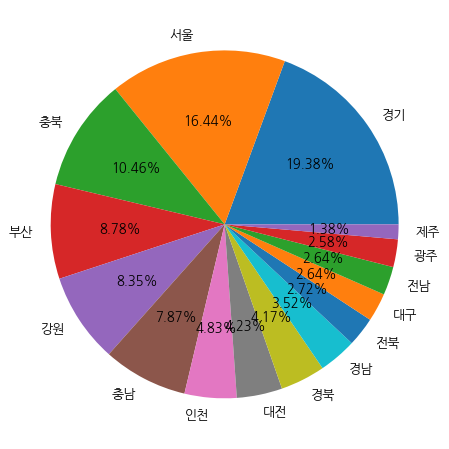

In [419]:
df_count_area1.plot.pie(autopct="%.2f%%",labels=df_count_area1.index,textprops={'fontsize': 13},label="")

### 거주지역에 따른 주문량 분포

In [420]:
df_count_area2 = df_final1.groupby(["거주지역"]).size().sort_values(ascending=False)
df_count_area2

거주지역
경기    30749
서울    26943
충북    16781
부산    13987
강원    13509
충남    12319
인천     7539
대전     6799
경북     6793
경남     5822
전북     4572
광주     4227
대구     4159
전남     4065
제주     2121
dtype: int64

<AxesSubplot:>

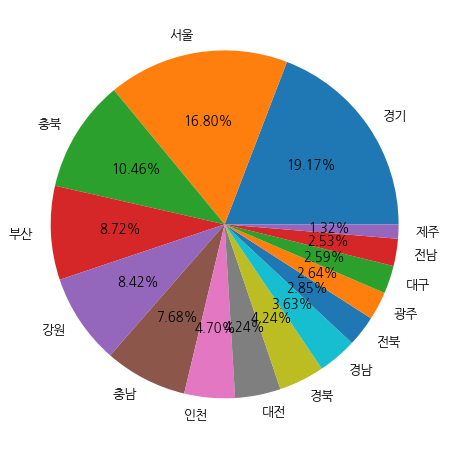

In [421]:
df_count_area2.plot.pie(autopct="%.2f%%",labels=df_count_area2.index,textprops={'fontsize': 13},label="")

사실상 주문이 많은 거주지역에 살수록 이에 따른 배송지연율도 증가하므로, 지역에 의한 배송지연 차이는 없다.

## 지역별 주문건수 대비 배송지연율 차이가 존재하는가? (chi-square)

- 귀무가설 : 지역별 주문건수 대비 배송지연율 차이가 없다.
- 대립가설 : 지역별 주문건수 대비 배송지연율 차이가 있다.

#### 교차테이블 그리기

In [422]:
df_areaNDelay = df_final1.groupby(["거주지역"]).count()[['주문번호']]  #거주지역당 주문건수
df_areaNDelay.rename(columns = {'주문번호' : '주문횟수'}, inplace = True)

df_areaNDelay["지연건수"] = df_final1[df_final1["배송지연여부"]==1].groupby(["거주지역"]).count()[["주문번호"]]

df_areaNDelay

,주문횟수,지연건수
거주지역,,
강원,13509,2192
경기,30749,5086
경남,5822,925
경북,6793,1094
광주,4227,676
대구,4159,694
대전,6799,1110
부산,13987,2305
서울,26943,4314


In [423]:
chi, pval, dof, expected = stats.chi2_contingency(df_areaNDelay)

print("[ chi-square test ]")
print("chi-square:{:.3f}".format(chi))
print("p-value:{:.3f}".format(pval))
print("expected value:\n{}".format(expected.round(3)))

[ chi-square test ]
chi-square:8.748
p-value:0.847
expected value:
[[13493.034  2207.966]
 [30795.673  5039.327]
 [ 5798.197   948.803]
 [ 6777.884  1109.116]
 [ 4213.512   689.488]
 [ 4170.543   682.457]
 [ 6796.79   1112.21 ]
 [14000.924  2291.076]
 [26861.458  4395.542]
 [ 7568.508  1238.492]
 [ 4089.762   669.238]
 [ 4542.652   743.348]
 [ 2132.967   349.033]
 [12362.097  2022.903]
 [16780.999  2746.001]]


## 물품대분류별로 얼마나 잘 팔리나도 정렬해볼까?

In [424]:
# 잘 팔리는 순으로 물품대분류 정렬
#여기서의 by는 어느 column을 넣던 상관이 없다.
df_final1_TopSalesSegmentList = df_final1.groupby(['물품대분류']).count().sort_values(by="주문번호",ascending=False).index.values
df_final1_TopSalesSegmentList

array(["['기저귀/팬티']", "['출산/수유/이유']", "['생활/가정용품']", "['아기용품']",
       "['여성용품']", "['물티슈']", "['기타']"], dtype=object)

'기저귀/팬티', '출산/수유/이유', '생활/가정용품', '아기용품', '여성용품', '물티슈', '기타' 순으로 잘 팔린다.

## 연도+분기 기반 물품대분류별 trend chart

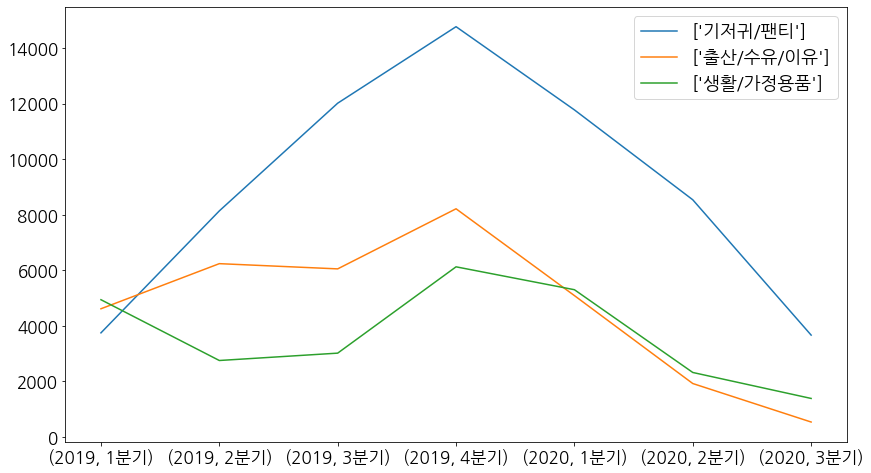

In [425]:
for i in df_final1_TopSalesSegmentList[:3]:
    df_final1.loc[(df_final1.물품대분류 == i)].groupby(["연도","분기"]).size().plot(fontsize=17)

plt.xlabel("")
plt.legend(df_final1_TopSalesSegmentList,fontsize=18)

## 상위/하위 물품대분류의 판매량에 대한 정규성 검정 : Shapiro

In [426]:
# 판매량이 높은 대분류인 '기저귀/팬티', '출산/수유/이유', '생활/가정용품'을 하나의 그룹으로 묶음
df_final1_sales1 = df_final1.loc[(df_final1.물품대분류 == df_final1_TopSalesSegmentList[0])]
df_final1_sales2 = df_final1.loc[(df_final1.물품대분류 == df_final1_TopSalesSegmentList[1])]
df_final1_sales3 = df_final1.loc[(df_final1.물품대분류 == df_final1_TopSalesSegmentList[2])]
df_final1_HighSales = pd.concat([df_final1_sales1,df_final1_sales2,df_final1_sales3]).groupby(["연도","분기"]).size()
df_final1_HighSales

연도    분기 
2019  1분기    13307
      2분기    17133
      3분기    21087
      4분기    29111
2020  1분기    22167
      2분기    12787
      3분기     5595
dtype: int64

In [427]:
shapiro(df_final1_HighSales)

(0.9852820038795471, 0.9811100959777832)

잘 팔리는 물품대분류에 대한 판매량은 **정규성을 만족한다.**

In [428]:
# 판매량이 낮은 대분류인 '아기용품','여성용품','물티슈','기타'를 하나의 그룹으로 묶음
df_final1_sales11 = df_final1.loc[(df_final1.물품대분류 == df_final1_TopSalesSegmentList[3])]
df_final1_sales22 = df_final1.loc[(df_final1.물품대분류 == df_final1_TopSalesSegmentList[4])]
df_final1_sales33 = df_final1.loc[(df_final1.물품대분류 == df_final1_TopSalesSegmentList[5])]
df_final1_sales44 = df_final1.loc[(df_final1.물품대분류 == df_final1_TopSalesSegmentList[6])]
df_final1_LowSales = pd.concat([df_final1_sales11,df_final1_sales22,df_final1_sales33,df_final1_sales44]).groupby(["연도","분기"]).size()
df_final1_LowSales

연도    분기 
2019  1분기     5393
      2분기     6122
      3분기     7258
      4분기    10800
2020  1분기     7003
      2분기     3821
      3분기     1462
dtype: int64

In [429]:
shapiro(df_final1_LowSales)

(0.9781646728515625, 0.9501650333404541)

잘 안 팔리는 물품대분류에 대한 판매량은 **정규성을 만족한다.**

## 각 물품대분류의 판매량에 대한 등분산성 검정 : Bartlett's test

두 가지에 대한 분산을 비교하는 상황이며, 둘 다 정규성을 만족하므로 Bartlett's test을 사용한다.

In [430]:
np.var(df_final1_HighSales)

50124832.816326536

In [431]:
np.var(df_final1_LowSales)

7335792.979591837

In [432]:
bartlett(df_final1_HighSales,df_final1_LowSales)

BartlettResult(statistic=4.478529947720728, pvalue=0.03432323173257687)

잘 팔리는 물품대분류와 (상대적으로) 잘 안 팔리는 물품대분류의 판매량에 대한 분산은 **서로 다르다.**

## 각 물품대분류의 배송지연건수에 대한 정규성 검정 : Shapiro

In [433]:
df_final1.head(2)

,주문번호,구매일,배송시작일,배송완료일,최종구매시월령,고객번호,구매금액,결제금액,상품명,상품준비시간,배송시간,연도,월,요일,주차,배송주말포함여부,분기,주말,계절,할인금액,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,물품대분류,배송지연여부_주말,평균결제금액,배송지연여부
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,4,2019,5,0,19,0,2분기,0,봄,9486,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes,['출산/수유/이유'],0,27041.5,1
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,2,2020,2,3,8,0,1분기,0,겨울,13431,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes,['기저귀/팬티'],0,3800.0,0


In [434]:
# 판매량이 높은 대분류인 '기저귀/팬티', '출산/수유/이유', '생활/가정용품'을 하나의 그룹으로 묶음
df_final1_one = df_final1.loc[(df_final1.배송지연여부==1) &(df_final1.물품대분류 == df_final1_TopSalesSegmentList[0])]
df_final1_two = df_final1.loc[(df_final1.배송지연여부==1) &(df_final1.물품대분류 == df_final1_TopSalesSegmentList[1])]
df_final1_three = df_final1.loc[(df_final1.배송지연여부==1) &(df_final1.물품대분류 == df_final1_TopSalesSegmentList[2])]
df_final1_High = pd.concat([df_final1_one,df_final1_two,df_final1_three]).groupby(["연도","분기"]).size()
df_final1_High

연도    분기 
2019  1분기    1942
      2분기    2912
      3분기    3786
      4분기    4403
2020  1분기    3743
      2분기    2108
      3분기     859
dtype: int64

In [435]:
shapiro(df_final1_High)

(0.9537347555160522, 0.7635236382484436)

잘 팔리는 물품대분류에 대한 배송지연건수는 **정규성을 만족한다.**

In [436]:
# 판매량이 낮은 대분류인 '아기용품','여성용품','물티슈','기타'를 하나의 그룹으로 묶음
df_final1_four = df_final1.loc[(df_final1.배송지연여부==1) &(df_final1.물품대분류 == df_final1_TopSalesSegmentList[3])]
df_final1_five = df_final1.loc[(df_final1.배송지연여부==1) &(df_final1.물품대분류 == df_final1_TopSalesSegmentList[4])]
df_final1_six = df_final1.loc[(df_final1.배송지연여부==1) &(df_final1.물품대분류 == df_final1_TopSalesSegmentList[5])]
df_final1_seven = df_final1.loc[(df_final1.배송지연여부==1) &(df_final1.물품대분류 == df_final1_TopSalesSegmentList[6])]
df_final1_Low = pd.concat([df_final1_four,df_final1_five,df_final1_six,df_final1_seven]).groupby(["연도","분기"]).size()
df_final1_Low


# df_final1_sales11 = df_final1.loc[(df_final1.물품대분류 == df_final1_TopSalesSegmentList[3])]
# df_final1_sales22 = df_final1.loc[(df_final1.물품대분류 == df_final1_TopSalesSegmentList[4])]
# df_final1_sales33 = df_final1.loc[(df_final1.물품대분류 == df_final1_TopSalesSegmentList[5])]
# df_final1_sales44 = df_final1.loc[(df_final1.물품대분류 == df_final1_TopSalesSegmentList[6])]
# df_final1_LowSales = pd.concat([df_final1_sales11,df_final1_sales22,df_final1_sales33,df_final1_sales44]).groupby(["연도","분기"]).size()
# df_final1_LowSales

연도    분기 
2019  1분기     771
      2분기    1106
      3분기    1309
      4분기    1589
2020  1분기    1198
      2분기     637
      3분기     209
dtype: int64

In [437]:
shapiro(df_final1_Low)

(0.9729012250900269, 0.9185284972190857)

잘 안 팔리는 물품대분류에 대한 배송지연건수는 **정규성을 만족한다.**

## 각 물품대분류의 배송지연건수에 대한 등분산성 검정 : Bartlett's test

두 가지에 대한 분산을 비교하는 상황이며, 둘 다 정규성을 만족하므로 Bartlett's test을 사용한다.

In [438]:
np.var(df_final1_High)

1346108.979591837

In [439]:
np.var(df_final1_Low)

185436.12244897962

In [440]:
bartlett(df_final1_High,df_final1_Low)

BartlettResult(statistic=4.730324942283398, pvalue=0.029635285937165166)

잘 팔리는 물품대분류와 (상대적으로) 잘 안 팔리는 물품대분류의 배송지연건수에 대한 분산은 **서로 다르다.**

## 20' 5월 전후의 전체 판매량에 대한 정규성 검정 : Shapiro

In [441]:
df_final1.head(2)

,주문번호,구매일,배송시작일,배송완료일,최종구매시월령,고객번호,구매금액,결제금액,상품명,상품준비시간,배송시간,연도,월,요일,주차,배송주말포함여부,분기,주말,계절,할인금액,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,물품대분류,배송지연여부_주말,평균결제금액,배송지연여부
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,4,2019,5,0,19,0,2분기,0,봄,9486,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes,['출산/수유/이유'],0,27041.5,1
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,2,2020,2,3,8,0,1분기,0,겨울,13431,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes,['기저귀/팬티'],0,3800.0,0


In [442]:
df_final1_tot = df_final1.groupby(["구매일"]).size()  # 일별 전체 판매량
df_final1_tot_pre = df_final1_tot.iloc[:481]  # 20' 5월 이전의 일별 전체 판매량
df_final1_tot_post = df_final1_tot.iloc[482:]  # 20' 5월 이후의 일별 전체 판매량

In [443]:
shapiro(df_final1_tot_pre)

(0.5630443692207336, 6.56271590034772e-33)

정규성 만족 못하는 상황

In [444]:
shapiro(df_final1_tot_post)

(0.9738765954971313, 0.045934200286865234)

정규성 만족 못하는 상황

## 20' 5월 전후의 전체 판매량에 대한 등분산성 검정 : Levene's test

20' 5월 전후의 판매량(주문건수)분산 표를 그려야 한다.

In [445]:
# numpy.var(리스트 or 튜플)
np.var(df_final1_tot_pre)

51616.786139409814

In [446]:
np.var(df_final1_tot_post)

8266.141414141419

In [447]:
levene(df_final1_tot_pre,df_final1_tot_post)

LeveneResult(statistic=3.1314665846326615, pvalue=0.07732182819580025)

사실상 20' 5월 전후의 판매량에 대한 변동성 차이는 없는 것으로 드러났다.

In [448]:
bartlett(df_final1_tot_pre,df_final1_tot_post)

BartlettResult(statistic=89.75666542801935, pvalue=2.6932940633857766e-21)

## 20' 5월 전후의 평균배송시간 분산

In [449]:
df_final1_tot = df_final1.groupby(["구매일"]).size()  # 일별 전체 판매량
# df_final1_tot_pre = df_final1_tot.iloc[:481]  # 20' 5월 이전의 일별 전체 판매량
# df_final1_tot_post = df_final1_tot.iloc[482:]  # 20' 5월 이후의 일별 전체 판매량
df_final1_tot

구매일
2019-01-01     39
2019-01-02     41
2019-01-03     68
2019-01-04     48
2019-01-05     53
             ... 
2020-08-03    186
2020-08-04    215
2020-08-05    166
2020-08-06    146
2020-08-07     74
Length: 581, dtype: int64

## 각 물품대분류 별 배송지연율

Text(0.5, 1.0, "['기타']")

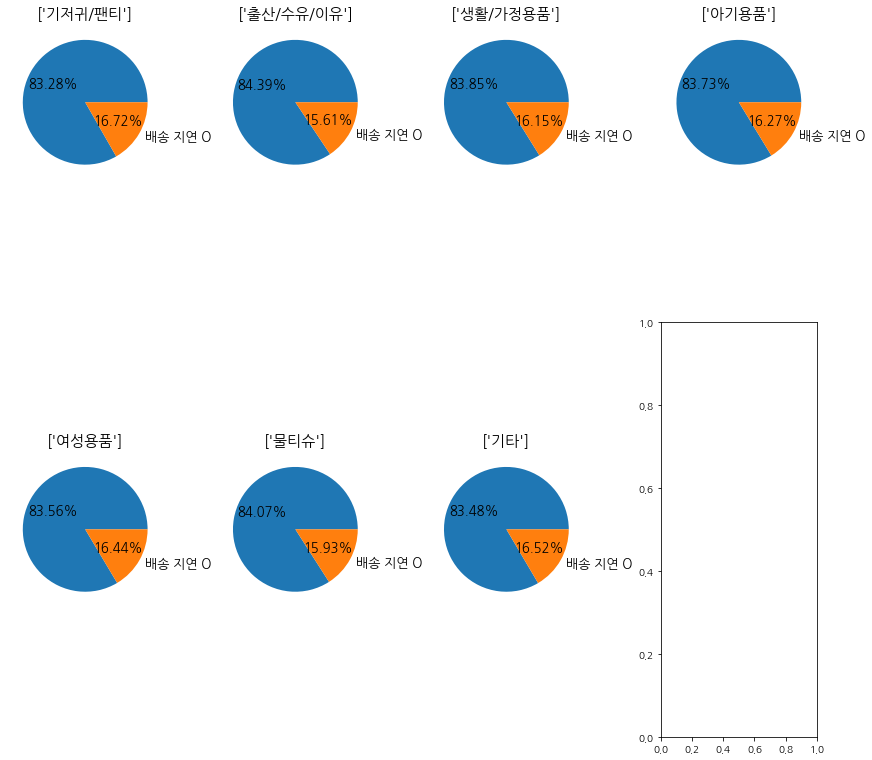

In [450]:
df_count1 = df_final1.loc[(df_final1.물품대분류 == df_final1_TopSalesSegmentList[0])].groupby(["배송지연여부"]).size()
df_count2 = df_final1.loc[(df_final1.물품대분류 == df_final1_TopSalesSegmentList[1])].groupby(["배송지연여부"]).size()
df_count3 = df_final1.loc[(df_final1.물품대분류 == df_final1_TopSalesSegmentList[2])].groupby(["배송지연여부"]).size()
df_count4 = df_final1.loc[(df_final1.물품대분류 == df_final1_TopSalesSegmentList[3])].groupby(["배송지연여부"]).size()
df_count5 = df_final1.loc[(df_final1.물품대분류 == df_final1_TopSalesSegmentList[4])].groupby(["배송지연여부"]).size()
df_count6 = df_final1.loc[(df_final1.물품대분류 == df_final1_TopSalesSegmentList[5])].groupby(["배송지연여부"]).size()
df_count7 = df_final1.loc[(df_final1.물품대분류 == df_final1_TopSalesSegmentList[6])].groupby(["배송지연여부"]).size()

scale = ["","배송 지연 O"]

#여기서부터
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (12, 12),constrained_layout=True)

ax[0][0].pie(df_count1.to_numpy(), autopct="%.2f%%",labels=scale,textprops={'fontsize': 13})
ax[0][0].set_title(df_final1_TopSalesSegmentList[0], fontsize = 15)

ax[0][1].pie(df_count2.to_numpy(), autopct="%.2f%%",labels=scale,textprops={'fontsize': 13})
ax[0][1].set_title(df_final1_TopSalesSegmentList[1], fontsize = 15)

ax[0][2].pie(df_count3.to_numpy(), autopct="%.2f%%",labels=scale,textprops={'fontsize': 13})
ax[0][2].set_title(df_final1_TopSalesSegmentList[2], fontsize = 15)

ax[0][3].pie(df_count4.to_numpy(), autopct="%.2f%%",labels=scale,textprops={'fontsize': 13})
ax[0][3].set_title(df_final1_TopSalesSegmentList[3], fontsize = 15)

ax[1][0].pie(df_count5.to_numpy(), autopct="%.2f%%",labels=scale,textprops={'fontsize': 13})
ax[1][0].set_title(df_final1_TopSalesSegmentList[4], fontsize = 15)

ax[1][1].pie(df_count6.to_numpy(), autopct="%.2f%%",labels=scale,textprops={'fontsize': 13})
ax[1][1].set_title(df_final1_TopSalesSegmentList[5], fontsize = 15)

ax[1][2].pie(df_count7.to_numpy(), autopct="%.2f%%",labels=scale,textprops={'fontsize': 13})
ax[1][2].set_title(df_final1_TopSalesSegmentList[6], fontsize = 15)

예상과 달리 물품대분류간 배송지연율 차이는 거의 없는 것으로 드러났다.  
뭐... insight는 **기저귀/팬티가 가장 잘 팔리는 품목인데 배송지연율이 가장 높다는 점?**

## 배송지연 되는 것 중 물품대분류 비율

Pie Chart 대신 Trend Chart로!

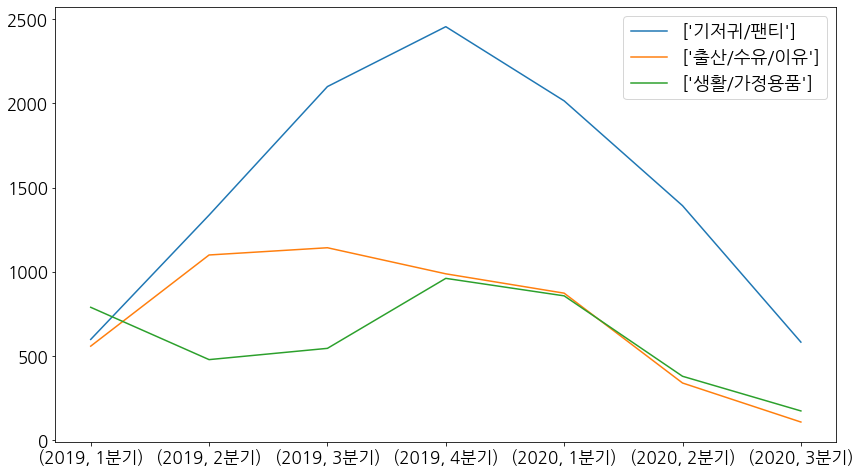

In [451]:
for i in df_final1_TopSalesSegmentList[:3]:
    df_final1.loc[(df_final1.배송지연여부==1) &(df_final1.물품대분류 == i)].groupby(["연도","분기"]).size().plot(fontsize=17)

plt.xlabel("")
plt.legend(df_final1_TopSalesSegmentList,fontsize=18)

In [452]:
df_count_delay = df_final1.loc[(df_final1.배송지연여부 == 1)].groupby(["물품대분류"]).size().sort_values(ascending=False)
df_count_delay

물품대분류
['기저귀/팬티']      10477
['출산/수유/이유']     5101
['생활/가정용품']      4175
['아기용품']         2397
['여성용품']         2015
['물티슈']          1350
['기타']           1057
dtype: int64

In [453]:
df_final1_TopSalesSegmentList

array(["['기저귀/팬티']", "['출산/수유/이유']", "['생활/가정용품']", "['아기용품']",
       "['여성용품']", "['물티슈']", "['기타']"], dtype=object)

<AxesSubplot:>

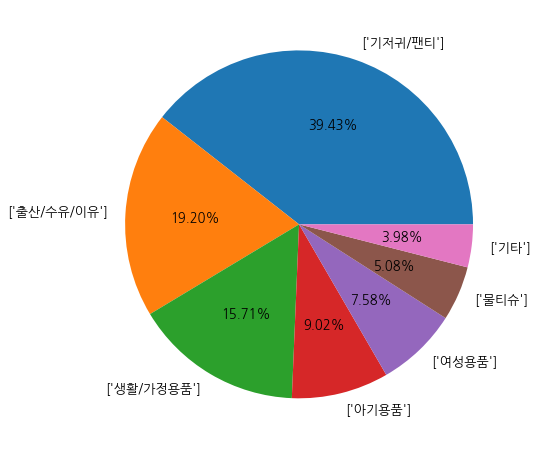

In [454]:
df_count_delay.plot.pie(autopct="%.2f%%",labels=df_final1_TopSalesSegmentList,textprops={'fontsize': 13},label="")

각 물품대분류당 배송지연율을 비슷하니, 판매량이 높은 품목이 비율이 높게 나온 게 너무.. 명료한 결과인 것 같다.  
→ 사용할 필요가 있을 것인가?

## 물품대분류별 주문건수 대비 배송지연율 차이가 존재하는가? (chi-square)

- 귀무가설 : 물품대분류별 주문건수 대비 배송지연율 차이가 없다.
- 대립가설 : 물품대분류별 주문건수 대비 배송지연율 차이가 있다.

In [455]:
df_segmentNDelay = df_final1.groupby(["물품대분류"]).count()[['주문번호']]  #물품대분류당 주문건수
df_segmentNDelay.rename(columns = {'주문번호' : '주문횟수'}, inplace = True)

df_segmentNDelay["지연건수"] = df_final1[df_final1["배송지연여부"]==1].groupby(["물품대분류"]).count()[["주문번호"]]

df_segmentNDelay.sort_values(by="주문횟수",ascending=False)

,주문횟수,지연건수
물품대분류,,
['기저귀/팬티'],62656,10477
['출산/수유/이유'],32677,5101
['생활/가정용품'],25854,4175
['아기용품'],14729,2397
['여성용품'],12257,2015
['물티슈'],8473,1350
['기타'],6400,1057


In [456]:
chi, pval, dof, expected = stats.chi2_contingency(df_segmentNDelay)

print("[ chi-square test ]")
print("chi-square:{:.3f}".format(chi))
print("p-value:{:.3f}".format(pval))
print("expected value:\n{}".format(expected.round(3)))

[ chi-square test ]
chi-square:15.304
p-value:0.018
expected value:
[[62884.553 10248.447]
 [ 6412.018  1044.982]
 [ 8446.46   1376.54 ]
 [25820.905  4208.095]
 [14726.059  2399.941]
 [12272.002  1999.998]
 [32484.004  5293.996]]


물품대분류별 주문건수 대비 배송지연율 차이는 존재한다!

## 가장 잘 팔리는 상위 30개 품목 유무를 표현하는 파생변수 생성

In [457]:
# 가장 많이 팔리는 품목 상위 30개
#여기서의 by는 어느 column을 넣던 상관이 없다.
df_final1_TopSalesList = df_final1.groupby(['상품명']).count().sort_values(by="주문번호",ascending=False).head(30).index.values
df_final1_TopSalesList

array(['하기스 네이처메이드 2단계 여아 156매(밴드형)', '하기스 네이처메이드 2단계 남아 156매(밴드형)',
       '더블하트 SofTouch 모유실감 젖꼭지 L (2입)', '더블하트 SofTouch 모유실감 젖꼭지 M (2입)',
       '하기스 네이처메이드 3단계 여아 132매(밴드형)', '하기스 네이처메이드 3단계 남아 132매(밴드형)',
       '더블하트 SofTouch 모유실감 젖꼭지 S (2입)', '더블하트 SofTouch 모유실감 젖꼭지 LL (2입)',
       '하기스 네이처메이드 1단계 공용 186매(밴드형)', '크리넥스 여행용티슈 카카오프렌즈 70매 X 3개입',
       '하기스 맥스드라이 3단계 공용 132매(밴드형)',
       '더블하트 SofTouch 모유실감 노꼭지 트윈팩 240ml(오렌지)',
       '더블하트 젖꼭지 브러쉬 와이드형+젖병 스펀지 브러쉬 일반형',
       '[2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)',
       '크리넥스 순수 3겹 소프트 27m-30롤', '크리넥스 안심 클래식 키친타월 140매 X 12롤',
       '하기스 매직핏기저귀 2단계 공용 192매(밴드형)', '릴리유 무민 리미티드 아기물티슈 캡형 80매X10팩',
       '크리넥스 마이비데 46매 X 10팩', '2020 하기스 매직 컴포트 3단계 공용 180매(밴드형)',
       '하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)', '하기스 네이처메이드 밤부 2단계 여아 156매(밴드형)',
       '그린핑거 힘센보습 울트라 로션 260ml', '하기스 네이처메이드 팬티 4단계 여아 96매(팬티형)',
       '하기스 네이처메이드 팬티 4단계 남아 96매(팬티형)', '하기스 네이처메이드 밤부 3단계 남아 144매(밴드형)',
       '크리넥스 안심 클래식 키친타올 120매 X 4롤', '하기스 네이처메이드 밤부 

In [458]:
df_final1.loc[df_final1.물품대분류=="['기저귀/팬티']"]

,주문번호,구매일,배송시작일,배송완료일,최종구매시월령,고객번호,구매금액,결제금액,상품명,상품준비시간,배송시간,연도,월,요일,주차,배송주말포함여부,분기,주말,계절,할인금액,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,물품대분류,배송지연여부_주말,평균결제금액,배송지연여부
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,2,2020,2,3,8,0,1분기,0,겨울,13431,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes,['기저귀/팬티'],0,3800.000,0
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,2,2019,5,0,20,0,2분기,0,봄,11598,2.018123e+14,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,['기저귀/팬티'],0,58266.000,0
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1,2,2019,5,4,19,1,2분기,0,봄,10852,2.018123e+14,여,미혼,경남,34.0,기업은행,지인추천,No,['기저귀/팬티'],0,NaN,0
5,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,[2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1,3,2019,7,0,31,0,3분기,0,여름,24536,2.018123e+14,여,미혼,경남,34.0,기업은행,지인추천,No,['기저귀/팬티'],0,29620.375,1
9,201907222628031,2019-07-23,2019-07-24,2019-07-26,NaN,201812310749783,47360,34761,[2019년형] 하기스 에어솔솔 썸머팬티 3단계 남아용 112매(팬티형),1,2,2019,7,1,30,0,3분기,0,여름,12599,2.018123e+14,여,미혼,경기,26.0,광주은행,검색광고,No,['기저귀/팬티'],0,9187.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163033,20200625123805-45572462388,2020-06-25,2020-06-26,2020-06-28,1.0,20200617223902505156,43400,24466,NEW 하기스 맥스드라이 2단계 공용 156매(밴드형),1,2,2020,6,3,26,0,2분기,0,여름,18934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['기저귀/팬티'],0,NaN,0
163037,20200710003924-14426170519,2020-07-10,2020-07-11,2020-07-14,3.0,20200626025830504959,50400,24474,NEW 하기스 네이처메이드 팬티 4단계 남아 96매(팬티형),1,3,2020,7,4,28,1,3분기,0,여름,25926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['기저귀/팬티'],1,NaN,0
163039,20200627233510-33942274635,2020-06-28,2020-06-29,2020-07-01,5.0,20200627231604996693,49900,33072,하기스 NEW 네이처메이드 썸머 3단계 공용 120매(밴드형),1,2,2020,6,6,26,0,2분기,1,여름,16828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['기저귀/팬티'],0,NaN,0
163041,20200629141852-43450076916,2020-06-29,2020-06-30,2020-07-03,NaN,20200629110941551863,49900,31112,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형),1,3,2020,6,0,27,0,2분기,0,여름,18788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['기저귀/팬티'],0,NaN,1


In [459]:
for a in df_final1_TopSalesList:
    df_final1.loc[df_final1.상품명.str.contains(i), '판매량상위'] = 1

df_final1["판매량상위"].fillna(0,inplace=True)
    
df_final1["판매량상위"] = df_final1["판매량상위"].astype(int)

In [460]:
df_final1["판매량상위"].unique()

array([0, 1])

In [461]:
len(df_final1[df_final1["판매량상위"] == 1])

47201

## 구매일에 따른 주문횟수와 평균배송시간 추이

In [462]:
df_trans2 = df_final1.groupby(['구매일']).count()[['주문번호']]
df_trans2.rename(columns = {'주문번호' : '주문횟수'}, inplace = True)
df_trans2['평균배송시간'] = df_final1.groupby(['구매일']).mean()[['배송시간']]
df_trans2

,주문횟수,평균배송시간
구매일,,
2019-01-01,39,2.282051
2019-01-02,41,2.536585
2019-01-03,68,2.426471
2019-01-04,48,2.333333
2019-01-05,53,2.339623
...,...,...
2020-08-03,186,2.451613
2020-08-04,215,2.386047
2020-08-05,166,2.283133


In [463]:
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_trans2)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_trans2.columns, index = df_trans2.index)

<AxesSubplot:xlabel='구매일'>

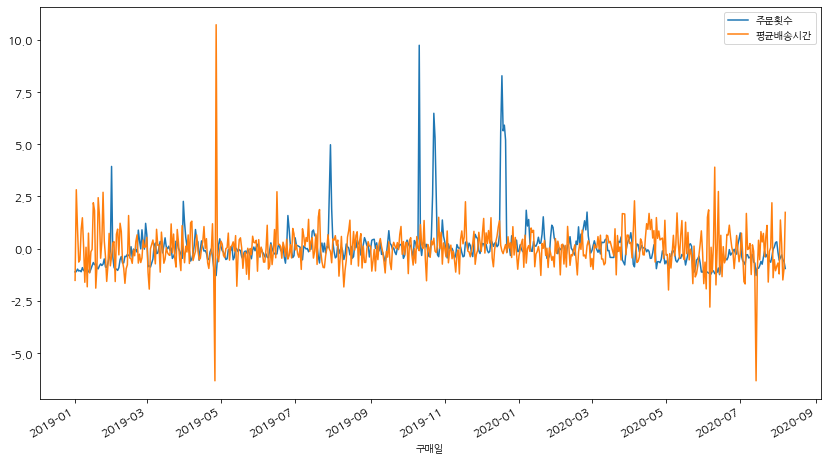

In [464]:
df_numeric_scaled.plot(fontsize=12)

2020년 3월 이후로부터 주문횟수가 약간 감소하는 추세를 보이고, 이에 따라 평균배송시간의 변동이 커진 것을 알 수 있다.  
**→ 배송시간의 안정성을 확보할 필요가 있다!**

In [465]:
df_numeric_scaled[df_numeric_scaled['평균배송시간'] >= 2]

,주문횟수,평균배송시간
구매일,,
2019-01-02,-1.106726,2.817010
2019-01-16,-0.667970,2.193316
2019-01-20,-0.972790,2.436854
2019-01-24,-0.746484,2.694717
2019-04-27,-1.291465,10.717136
2019-06-16,-0.252307,2.721341
2019-11-18,0.301910,2.242587
2020-04-05,-0.875802,2.286985
2020-06-10,-1.203714,3.898080


## 연도+분기에 따른 주문횟수와 평균배송시간 추이

In [466]:
df_trans3 = df_final1.groupby(['연도',"분기"]).count()[['주문번호']]
df_trans3.rename(columns = {'주문번호' : '주문횟수'}, inplace = True)
df_trans3['평균배송시간'] = df_final1.groupby(["연도","분기"]).mean()[['배송시간']]
df_trans3

주문횟수    평균배송시간
연도   분기                  
2019 1분기  18700  2.367005
     2분기  23255  2.368523
     3분기  28345  2.369201
     4분기  39911  2.376312
2020 1분기  29170  2.366644
     2분기  16608  2.377288
     3분기   7057  2.359926

In [467]:
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_trans3)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_trans3.columns, index = df_trans3.index)

<AxesSubplot:xlabel='연도,분기'>

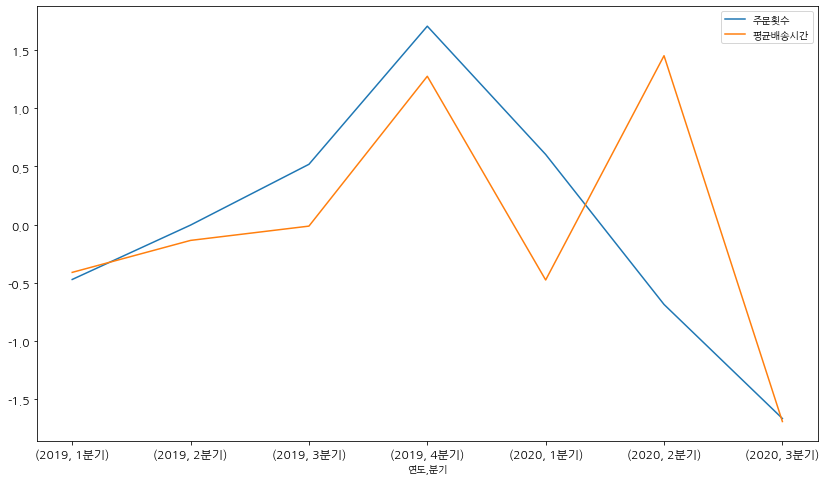

In [468]:
df_numeric_scaled.plot(fontsize=12)

2019년 4분기를 기점으로 평균배송시간이 크게 증가하여 이후 2020년 1분기에 잠시 배송시간이 줄어드나,   
**2019년 4분기부터 주문횟수는 계속 하락하는 추세이다.**

# 잘 팔리는 물품의 판매량과 평균배송시간 추이 예측 - 시계열 분석

In [474]:
df_final1_TopSalesList

array(['하기스 네이처메이드 2단계 여아 156매(밴드형)', '하기스 네이처메이드 2단계 남아 156매(밴드형)',
       '더블하트 SofTouch 모유실감 젖꼭지 L (2입)', '더블하트 SofTouch 모유실감 젖꼭지 M (2입)',
       '하기스 네이처메이드 3단계 여아 132매(밴드형)', '하기스 네이처메이드 3단계 남아 132매(밴드형)',
       '더블하트 SofTouch 모유실감 젖꼭지 S (2입)', '더블하트 SofTouch 모유실감 젖꼭지 LL (2입)',
       '하기스 네이처메이드 1단계 공용 186매(밴드형)', '크리넥스 여행용티슈 카카오프렌즈 70매 X 3개입',
       '하기스 맥스드라이 3단계 공용 132매(밴드형)',
       '더블하트 SofTouch 모유실감 노꼭지 트윈팩 240ml(오렌지)',
       '더블하트 젖꼭지 브러쉬 와이드형+젖병 스펀지 브러쉬 일반형',
       '[2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)',
       '크리넥스 순수 3겹 소프트 27m-30롤', '크리넥스 안심 클래식 키친타월 140매 X 12롤',
       '하기스 매직핏기저귀 2단계 공용 192매(밴드형)', '릴리유 무민 리미티드 아기물티슈 캡형 80매X10팩',
       '크리넥스 마이비데 46매 X 10팩', '2020 하기스 매직 컴포트 3단계 공용 180매(밴드형)',
       '하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)', '하기스 네이처메이드 밤부 2단계 여아 156매(밴드형)',
       '그린핑거 힘센보습 울트라 로션 260ml', '하기스 네이처메이드 팬티 4단계 여아 96매(팬티형)',
       '하기스 네이처메이드 팬티 4단계 남아 96매(팬티형)', '하기스 네이처메이드 밤부 3단계 남아 144매(밴드형)',
       '크리넥스 안심 클래식 키친타올 120매 X 4롤', '하기스 네이처메이드 밤부 

In [470]:
df_final1.loc[df_final1.상품명 == "하기스 네이처메이드 2단계 여아 156매(밴드형)"].head(2)

,주문번호,구매일,배송시작일,배송완료일,최종구매시월령,고객번호,구매금액,결제금액,상품명,상품준비시간,배송시간,연도,월,요일,주차,배송주말포함여부,분기,주말,계절,할인금액,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,물품대분류,배송지연여부_주말,평균결제금액,배송지연여부,판매량상위
86,201812311863330,2019-01-01,2019-01-02,2019-01-04,0.0,201812310749866,104640,71344,하기스 네이처메이드 2단계 여아 156매(밴드형),1,2,2019,1,1,1,0,1분기,0,겨울,33296,2.018123e+14,여,기혼,서울,36.0,광주은행,네이버카페,Yes,['기저귀/팬티'],0,NaN,0,0
87,201902092009205,2019-02-09,2019-02-10,2019-02-13,1.0,201812310749866,104640,72072,하기스 네이처메이드 2단계 여아 156매(밴드형),1,3,2019,2,5,6,1,1분기,1,겨울,32568,2.018123e+14,여,기혼,서울,36.0,광주은행,네이버카페,Yes,['기저귀/팬티'],1,7642.0,0,0


In [471]:
df_first = df_final1.loc[df_final1.상품명 == df_final1_TopSalesList[0]]

df_first_trans = df_first.groupby(['구매일']).count()[['주문번호']]
df_first_trans.reset_index(level=0, inplace=True)
df_first_trans.rename(columns = {'구매일' : "ds"}, inplace = True)
df_first_trans.rename(columns = {'주문번호' : "y"}, inplace = True)
df_first_trans

,ds,y
0,2019-01-01,5
1,2019-01-03,1
2,2019-01-04,1
3,2019-01-05,1
4,2019-01-06,3
...,...,...
427,2020-03-25,6
428,2020-03-28,1
429,2020-03-29,1
430,2020-03-30,3


In [472]:
# m = Prophet() # Default growth='linear'
# m.daily_seasonality=True
# m.weekly_seasonality=True
# m.fit(df_first_trans)

In [473]:
df_final1.head()

,주문번호,구매일,배송시작일,배송완료일,최종구매시월령,고객번호,구매금액,결제금액,상품명,상품준비시간,배송시간,연도,월,요일,주차,배송주말포함여부,분기,주말,계절,할인금액,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,물품대분류,배송지연여부_주말,평균결제금액,배송지연여부,판매량상위
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,4,2019,5,0,19,0,2분기,0,봄,9486,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes,['출산/수유/이유'],0,27041.5,1,0
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,2,2020,2,3,8,0,1분기,0,겨울,13431,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes,['기저귀/팬티'],0,3800.0,0,0
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,크리넥스？키즈용？화장지？3겹？27m 8롤,1,4,2019,2,3,9,1,1분기,0,겨울,1810,2.018123e+14,여,기혼,제주,33.0,국민은행,검색광고,Yes,['생활/가정용품'],1,47922.0,0,1
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,2,2019,5,0,20,0,2분기,0,봄,11598,2.018123e+14,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,['기저귀/팬티'],0,58266.0,0,0
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1,2,2019,5,4,19,1,2분기,0,봄,10852,2.018123e+14,여,미혼,경남,34.0,기업은행,지인추천,No,['기저귀/팬티'],0,NaN,0,1


## 가장 잘 팔린 물품에 대한 판매량과 평균배송시간 추이 (trend chart)

In [475]:
# 하기스 네이처메이드 2단계 여아 156매(밴드형)
# cond1 = (df_final1["상품명"] == "하기스 네이처메이드 2단계 여아 156매(밴드형)")
# print(sum(cond1))


# 가장 잘 팔린 제품을 가진 데이터 수 출력
print(len(df_final1[df_final1["상품명"] == df_final1_TopSalesList[0]]))

df_first = df_final1[df_final1["상품명"] == df_final1_TopSalesList[0]]

# df2 = df_raw_final.loc[cond1]
# df2.head()

3010


In [476]:
# 결제금액 추이하기 위해 테이블 형성
df_purchase = pd.pivot_table(data = df_first, index = "구매일", values = '결제금액', aggfunc='sum')
df_purchase.info()

# 결제금액을 (원래도 일 단위이지만) 일 단위로 평균을 계산해서 다시 넣음
y = df_purchase["결제금액"].resample("1D").mean()

# y = df_time['결제금액'].resample('1D').mean()
y.isnull().sum()
y1 = y.fillna(method = "ffill")  # 결측치를 바로 전 날의 데이터로 채워넣기

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 432 entries, 2019-01-01 to 2020-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   결제금액    432 non-null    int64
dtypes: int64(1)
memory usage: 6.8 KB


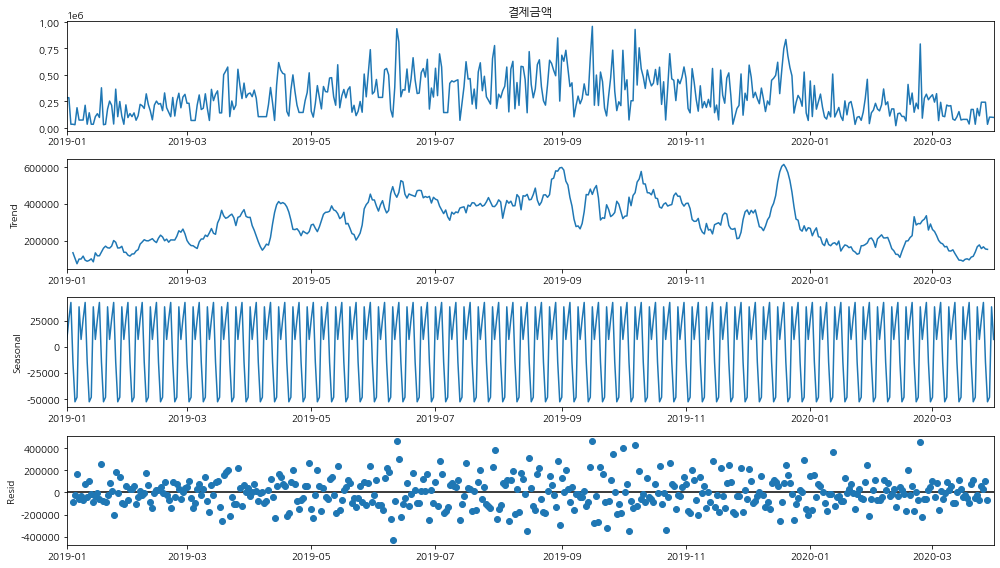

In [477]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y1, model = 'additive')
fig = model_series.plot()
plt.show()

## 시계열 분석

In [478]:
p = d = q = range(0, 2)  # p,d,q 모두 [0,1](list) 가진다.

# Cartesian Product (조합 경우의 수) 구하기
pdq = list(itertools.product(p, d, q))   # [(0, 0, 0), (0, 0, 1),...(1, 1, 1)]
pdq

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]  # 맨 마지막 값 : "seasonal"이므로 12
seasonal_pdq

# print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1])
# print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
# print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
# print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [480]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [483]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y1,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

In [484]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')        

In [485]:
ARIMA_list.sort_values(by='AIC').head(2)        

,Parameter,Seasonal,AIC
43,"(1, 0, 1)","(0, 1, 1, 12)",11640.337089
47,"(1, 0, 1)","(1, 1, 1, 12)",11641.590479


In [487]:
mod = tsa.statespace.SARIMAX(y1,order=(1, 0, 1),seasonal_order=(0, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               결제금액   No. Observations:                  456
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -5816.169
Date:                            Sun, 28 May 2023   AIC                          11640.337
Time:                                    23:49:48   BIC                          11656.592
Sample:                                01-01-2019   HQIC                         11646.756
                                     - 03-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9651      0.016     59.306      0.000       0.933       0.997
ma.L1         -0.8397      0.053   

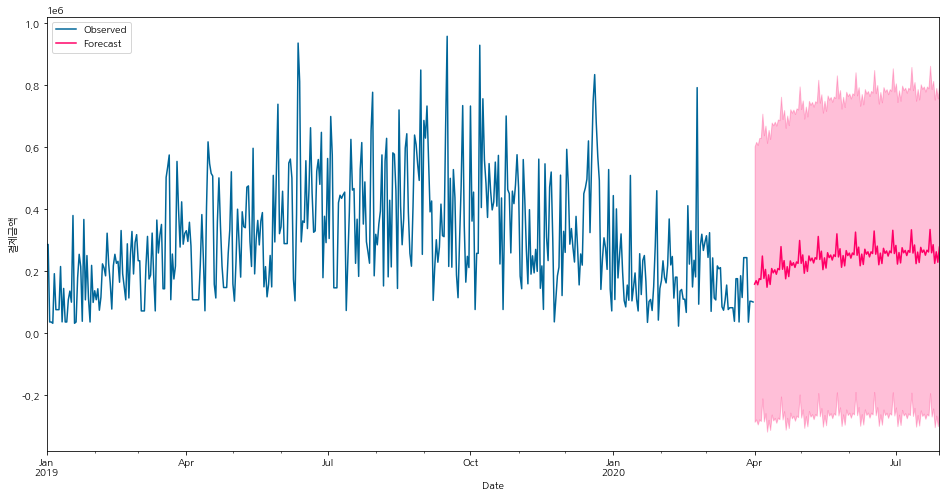

In [501]:
start_time = y1.index.min()
end_time = y1.index.max()

pred_uc = results.get_forecast(steps=120)
pred_ci = pred_uc.conf_int()

ax = y1.plot(label='Observed', figsize=(16,8), color='#006699')
pred_uc.predicted_mean.plot(ax=ax, label="Forecast", color="#ff0066")
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color="#ff0066", alpha=.25)
ax.set_xlabel("Date")
ax.set_ylabel("결제금액")
plt.legend(loc="upper left")
plt.show()